In [4]:
import pandas as pd
import numpy as np


In [83]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
uncleaned_ml_combined=pd.read_csv("../CSVs/ml_combined_updated2023.csv",index_col=False)

In [84]:
uncleaned_ml_combined.head()


Longitude  Latitude  Year_final  Lake_area_calculated_ha  Elevation_m  \
0     74.609    42.522        1984                      NaN         3466   
1     79.846    42.207        1984                      NaN         3269   
2     77.193    35.677        1984                      NaN         4779   
3     83.967    29.307        1985                      NaN         4594   
4     74.633    36.039        1985                      NaN         3301   

  Lake_type_simplified  is_supraglacial  glacier_area_ha  slope_glac_to_lake  \
0                other                0       536.125805            0.000000   
1                  ice                0       396.118156            2.959854   
2                  ice                0      9444.515664            0.718550   
3                other                0              NaN                 NaN   
4                other                0      6998.712273            0.000000   

   glacier_contact  glacier_touch_count  nearest_glacier_dist_m  \
0                1                    2                0.000000   
1                0                    0              446.305779   
2                0                    0             1036.810675   
3                0                    0                     NaN   
4                1                    3                0.000000   

   glacier_elev_m  5y_expansion_rate  10y_expansion_rate  GLOF  
0          3985.0                NaN                 NaN     1  
1          4590.0                NaN                 NaN     1  
2          5524.0                NaN                 NaN     1  
3             NaN                NaN                 NaN     1  
4          4575.0                NaN                 NaN     1

In [85]:
uncleaned_ml_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Longitude                2652 non-null   float64
 1   Latitude                 2652 non-null   float64
 2   Year_final               2652 non-null   int64  
 3   Lake_area_calculated_ha  2590 non-null   float64
 4   Elevation_m              2652 non-null   int64  
 5   Lake_type_simplified     2652 non-null   object 
 6   is_supraglacial          2652 non-null   int64  
 7   glacier_area_ha          2063 non-null   float64
 8   slope_glac_to_lake       2063 non-null   float64
 9   glacier_contact          2652 non-null   int64  
 10  glacier_touch_count      2652 non-null   int64  
 11  nearest_glacier_dist_m   2063 non-null   float64
 12  glacier_elev_m           2063 non-null   float64
 13  5y_expansion_rate        2536 non-null   float64
 14  10y_expansion_rate      

In [86]:
# Split into positives (GLOF = 1) and negatives (GLOF = 0)
uncleaned_ml_pos = uncleaned_ml_combined[uncleaned_ml_combined["GLOF"] == 1].reset_index(drop=True)
uncleaned_ml_neg = uncleaned_ml_combined[uncleaned_ml_combined["GLOF"] == 0].reset_index(drop=True)

# Save both to CSV
uncleaned_ml_pos.to_csv("../CSVs/ml_pos_updated2023.csv", index=False)
uncleaned_ml_neg.to_csv("../CSVs/ml_neg_updated2023.csv", index=False)

In [87]:
uncleaned_ml_pos.info()
uncleaned_ml_pos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Longitude                241 non-null    float64
 1   Latitude                 241 non-null    float64
 2   Year_final               241 non-null    int64  
 3   Lake_area_calculated_ha  181 non-null    float64
 4   Elevation_m              241 non-null    int64  
 5   Lake_type_simplified     241 non-null    object 
 6   is_supraglacial          241 non-null    int64  
 7   glacier_area_ha          239 non-null    float64
 8   slope_glac_to_lake       239 non-null    float64
 9   glacier_contact          241 non-null    int64  
 10  glacier_touch_count      241 non-null    int64  
 11  nearest_glacier_dist_m   239 non-null    float64
 12  glacier_elev_m           239 non-null    float64
 13  5y_expansion_rate        128 non-null    float64
 14  10y_expansion_rate       9

Longitude  Latitude  Year_final  Lake_area_calculated_ha  Elevation_m  \
0       74.609    42.522        1984                      NaN         3466   
1       79.846    42.207        1984                      NaN         3269   
2       77.193    35.677        1984                      NaN         4779   
3       83.967    29.307        1985                      NaN         4594   
4       74.633    36.039        1985                      NaN         3301   
..         ...       ...         ...                      ...          ...   
236     74.563    36.361        2022                 4.845224         2722   
237     79.846    42.207        2022               564.891914         3269   
238     79.846    42.207        2023               372.463144         3269   
239     88.195    27.913        2023               153.864548         5207   
240     98.004    28.717        2017                53.073789         4651   

    Lake_type_simplified  is_supraglacial  glacier_area_ha  \
0                  other                0       536.125805   
1                    ice                0       396.118156   
2                    ice                0      9444.515664   
3                  other                0              NaN   
4                  other                0      6998.712273   
..                   ...              ...              ...   
236                  ice                0     10772.701171   
237                  ice                0    121340.473107   
238                  ice                0    121325.170221   
239              moraine                0      7565.515637   
240              moraine                0       643.763274   

     slope_glac_to_lake  glacier_contact  glacier_touch_count  \
0              0.000000                1                    2   
1              2.959854                0                    0   
2              0.718550                0                    0   
3                   NaN                0                    0   
4              0.000000                1                    3   
..                  ...              ...                  ...   
236            0.000000                1                    3   
237            0.000000                1                   11   
238            0.000000                1                   10   
239            0.000000                1                    5   
240            0.000000                1                    9   

     nearest_glacier_dist_m  glacier_elev_m  5y_expansion_rate  \
0                  0.000000          3985.0                NaN   
1                446.305779          4590.0                NaN   
2               1036.810675          5524.0                NaN   
3                       NaN             NaN                NaN   
4                  0.000000          4575.0                NaN   
..                      ...             ...                ...   
236                0.000000          3839.0           0.448360   
237                0.000000          4448.0          55.345379   
238                0.000000          4448.0          65.605221   
239                0.000000          5676.0           3.221736   
240                0.000000          5278.0           8.976864   

     10y_expansion_rate  GLOF  
0                   NaN     1  
1                   NaN     1  
2                   NaN     1  
3                   NaN     1  
4                   NaN     1  
..                  ...   ...  
236            0.925647     1  
237           94.604194     1  
238           64.792941     1  
239            7.237081     1  
240            7.370465     1  

[241 rows x 16 columns]

In [88]:
uncleaned_ml_neg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2411 entries, 0 to 2410
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Longitude                2411 non-null   float64
 1   Latitude                 2411 non-null   float64
 2   Year_final               2411 non-null   int64  
 3   Lake_area_calculated_ha  2409 non-null   float64
 4   Elevation_m              2411 non-null   int64  
 5   Lake_type_simplified     2411 non-null   object 
 6   is_supraglacial          2411 non-null   int64  
 7   glacier_area_ha          1824 non-null   float64
 8   slope_glac_to_lake       1824 non-null   float64
 9   glacier_contact          2411 non-null   int64  
 10  glacier_touch_count      2411 non-null   int64  
 11  nearest_glacier_dist_m   1824 non-null   float64
 12  glacier_elev_m           1824 non-null   float64
 13  5y_expansion_rate        2408 non-null   float64
 14  10y_expansion_rate      

In [89]:
uncleaned_ml_pos.isnull().mean()*100

Longitude                   0.000000
Latitude                    0.000000
Year_final                  0.000000
Lake_area_calculated_ha    24.896266
Elevation_m                 0.000000
Lake_type_simplified        0.000000
is_supraglacial             0.000000
glacier_area_ha             0.829876
slope_glac_to_lake          0.829876
glacier_contact             0.000000
glacier_touch_count         0.000000
nearest_glacier_dist_m      0.829876
glacier_elev_m              0.829876
5y_expansion_rate          46.887967
10y_expansion_rate         60.165975
GLOF                        0.000000
dtype: float64

In [90]:
uncleaned_ml_neg.isnull().mean()*100

Longitude                   0.000000
Latitude                    0.000000
Year_final                  0.000000
Lake_area_calculated_ha     0.082953
Elevation_m                 0.000000
Lake_type_simplified        0.000000
is_supraglacial             0.000000
glacier_area_ha            24.346744
slope_glac_to_lake         24.346744
glacier_contact             0.000000
glacier_touch_count         0.000000
nearest_glacier_dist_m     24.346744
glacier_elev_m             24.346744
5y_expansion_rate           0.124430
10y_expansion_rate          0.082953
GLOF                        0.000000
dtype: float64

In [91]:
uncleaned_ml_combined.isnull().mean()*100

Longitude                   0.000000
Latitude                    0.000000
Year_final                  0.000000
Lake_area_calculated_ha     2.337858
Elevation_m                 0.000000
Lake_type_simplified        0.000000
is_supraglacial             0.000000
glacier_area_ha            22.209653
slope_glac_to_lake         22.209653
glacier_contact             0.000000
glacier_touch_count         0.000000
nearest_glacier_dist_m     22.209653
glacier_elev_m             22.209653
5y_expansion_rate           4.374057
10y_expansion_rate          5.542986
GLOF                        0.000000
dtype: float64

### Complete Case Analysis

In [92]:
# Load Data
df_comb = pd.read_csv("../CSVs/ml_combined_updated2023.csv")
df_pos  = pd.read_csv("../CSVs/ml_pos_updated2023.csv")

# Complete Case Analysis (CCA)
df_comb_dropna = df_comb.dropna()
df_pos_dropna  = df_pos.dropna()

print(df_comb.shape)
print(df_pos.shape)
print(df_comb_dropna.shape)
print(df_pos_dropna.shape)


(2652, 16)
(241, 16)
(1897, 16)
(73, 16)


In [93]:
df_pos.info

<bound method DataFrame.info of      Longitude  Latitude  Year_final  Lake_area_calculated_ha  Elevation_m  \
0       74.609    42.522        1984                      NaN         3466   
1       79.846    42.207        1984                      NaN         3269   
2       77.193    35.677        1984                      NaN         4779   
3       83.967    29.307        1985                      NaN         4594   
4       74.633    36.039        1985                      NaN         3301   
..         ...       ...         ...                      ...          ...   
236     74.563    36.361        2022                 4.845224         2722   
237     79.846    42.207        2022               564.891914         3269   
238     79.846    42.207        2023               372.463144         3269   
239     88.195    27.913        2023               153.864548         5207   
240     98.004    28.717        2017                53.073789         4651   

    Lake_type_simplified  is_su

In [94]:
df_comb.head()

Longitude  Latitude  Year_final  Lake_area_calculated_ha  Elevation_m  \
0     74.609    42.522        1984                      NaN         3466   
1     79.846    42.207        1984                      NaN         3269   
2     77.193    35.677        1984                      NaN         4779   
3     83.967    29.307        1985                      NaN         4594   
4     74.633    36.039        1985                      NaN         3301   

  Lake_type_simplified  is_supraglacial  glacier_area_ha  slope_glac_to_lake  \
0                other                0       536.125805            0.000000   
1                  ice                0       396.118156            2.959854   
2                  ice                0      9444.515664            0.718550   
3                other                0              NaN                 NaN   
4                other                0      6998.712273            0.000000   

   glacier_contact  glacier_touch_count  nearest_glacier_dist_m  \
0                1                    2                0.000000   
1                0                    0              446.305779   
2                0                    0             1036.810675   
3                0                    0                     NaN   
4                1                    3                0.000000   

   glacier_elev_m  5y_expansion_rate  10y_expansion_rate  GLOF  
0          3985.0                NaN                 NaN     1  
1          4590.0                NaN                 NaN     1  
2          5524.0                NaN                 NaN     1  
3             NaN                NaN                 NaN     1  
4          4575.0                NaN                 NaN     1

In [95]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.base import clone


In [102]:
# Load Data
df_comb = pd.read_csv("../CSVs/ml_combined_updated2023.csv")

# Complete Case Analysis (CCA)
df_comb = df_comb.dropna()

# Features and Target
X = df_comb.drop("GLOF", axis=1)
y = df_comb["GLOF"]

# Preprocessing
# Only one-hot encode Lake_type_simplified,
# all others are numeric (including 0/1 binary flags)
cat_features = ["Lake_type_simplified"]
exclude_cols = cat_features + ["Latitude", "Longitude","Year_final"]
num_features = [col for col in X.columns if col not in exclude_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)
# check class balance
print(df_comb["GLOF"].value_counts())

df_temp = df_comb.dropna()
count_pos = df_temp[df_temp["GLOF"] == 1].shape[0]
print("Rows with GLOF = 1 after dropna():", count_pos)

GLOF
0    1824
1      73
Name: count, dtype: int64
Rows with GLOF = 1 after dropna(): 73


In [103]:
# Ensemble Creation Function
# Undersample majority class into many subsets, train separate classifiers

def create_ensemble(X_train, y_train, n_models=5, base_model=None):
    """
    Create an ensemble of classifiers with undersampling.
    
    Parameters:
    - X_train, y_train: training data
    - n_models: number of models in ensemble
    - base_model: the classifier to use (e.g., RandomForestClassifier(), LogisticRegression(), XGBClassifier())
    """
    if base_model is None:
        base_model = RandomForestClassifier()  # default

    models = []

    # Split into minority (1) and majority (0)
    X_minority = X_train[y_train == 1]
    y_minority = y_train[y_train == 1]
    X_majority = X_train[y_train == 0]
    y_majority = y_train[y_train == 0]

    for i in range(n_models):
        # Undersample majority class
        X_majority_resampled, y_majority_resampled = resample(
            X_majority, y_majority,
            replace=False,
            n_samples=len(y_minority),
            random_state=i
        )

        # Combine resampled majority + minority
        X_balanced = pd.concat([X_majority_resampled, X_minority])
        y_balanced = pd.concat([y_majority_resampled, y_minority])

        # Clone base_model so each one is fresh
        clf = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("classifier", clone(base_model).set_params(random_state=i))
            if hasattr(base_model, "random_state") else
            ("classifier", clone(base_model))
        ])

        # Train
        clf.fit(X_balanced, y_balanced)
        models.append(clf)

    return models

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Helper: Ensemble Prediction
def ensemble_predict(models, X):
    preds = np.array([m.predict(X) for m in models])
    # Majority vote: if at least half the models predict 1, label as 1 (else 0)
    final_preds = (np.sum(preds, axis=0) >= (len(models) / 2)).astype(int)
    return final_preds


In [104]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
def evaluate_ensemble(name, ensemble_models, X_test, y_test, plot=True):
    # Predictions
    y_pred = ensemble_predict(ensemble_models, X_test)

    # Classification report
    print(f"\n=== {name} Ensemble: Classification Report ===")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    print(f"\n=== {name} Ensemble: Confusion Matrix ===")
    print(confusion_matrix(y_test, y_pred))

    # ROC-AUC (use predicted probabilities)
    y_probas = np.mean([m.predict_proba(X_test)[:, 1] for m in ensemble_models], axis=0)
    auc_score = roc_auc_score(y_test, y_probas)
    print(f"\n{name} Ensemble: ROC-AUC = {auc_score:.4f}")

    # Plot ROC curve
    if plot:
        fpr, tpr, _ = roc_curve(y_test, y_probas)
        plt.figure(figsize=(7,5))
        plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color="blue")
        plt.plot([0, 1], [0, 1], "k--", label="Chance")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {name} Ensemble")
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()


In [107]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

def evaluate_ensemble(name, ensemble_models, X_test, y_test, plot=True):
    # --- Predictions ---
    y_pred = ensemble_predict(ensemble_models, X_test)

    # --- Classification Report ---
    print(f"\n=== {name} Ensemble: Classification Report ===")
    print(classification_report(y_test, y_pred))

    # --- Confusion Matrix ---
    print(f"\n=== {name} Ensemble: Confusion Matrix ===")
    print(confusion_matrix(y_test, y_pred))

    # --- ROC-AUC (use predicted probabilities) ---
    y_probas = np.mean([m.predict_proba(X_test)[:, 1] for m in ensemble_models], axis=0)
    auc_score = roc_auc_score(y_test, y_probas)
    print(f"\n{name} Ensemble: ROC-AUC = {auc_score:.4f}")

    # --- Feature Importances (for tree-based models only) ---
    feature_names = ensemble_models[0].named_steps["preprocessor"].get_feature_names_out()
    importances = []

    for m in ensemble_models:
        clf = m.named_steps["classifier"]
        if hasattr(clf, "feature_importances_"):
            importances.append(clf.feature_importances_)

    if importances:
        mean_importances = np.mean(importances, axis=0)
        sorted_idx = np.argsort(mean_importances)[::-1]

        print(f"\n=== {name} Ensemble: Mean Feature Importances ===")
        for idx in sorted_idx[:15]:  # top 15 features
            print(f"{feature_names[idx]:40s}  {mean_importances[idx]:.4f}")

        # --- Plot top features ---
        plt.figure(figsize=(8, 6))
        plt.barh(np.array(feature_names)[sorted_idx[:15]][::-1],
                 mean_importances[sorted_idx[:15]][::-1],
                 color="teal")
        plt.title(f"Top Feature Importances - {name} Ensemble")
        plt.xlabel("Mean Importance")
        plt.tight_layout()
        plt.show()

    # --- ROC Curve ---
    if plot:
        fpr, tpr, _ = roc_curve(y_test, y_probas)
        plt.figure(figsize=(7,5))
        plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color="blue")
        plt.plot([0, 1], [0, 1], "k--", label="Chance")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {name} Ensemble")
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()



=== Random Forest Ensemble: Classification Report ===
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       365
           1       0.22      0.73      0.33        15

    accuracy                           0.88       380
   macro avg       0.60      0.81      0.63       380
weighted avg       0.96      0.88      0.91       380


=== Random Forest Ensemble: Confusion Matrix ===
[[325  40]
 [  4  11]]

Random Forest Ensemble: ROC-AUC = 0.9003

=== Random Forest Ensemble: Mean Feature Importances ===
cat__Lake_type_simplified_other           0.1361
num__10y_expansion_rate                   0.1186
cat__Lake_type_simplified_ice             0.1175
num__Elevation_m                          0.1131
num__glacier_area_ha                      0.1041
num__Lake_area_calculated_ha              0.0950
num__glacier_elev_m                       0.0777
num__5y_expansion_rate                    0.0689
num__glacier_touch_count                  0.0602
num_

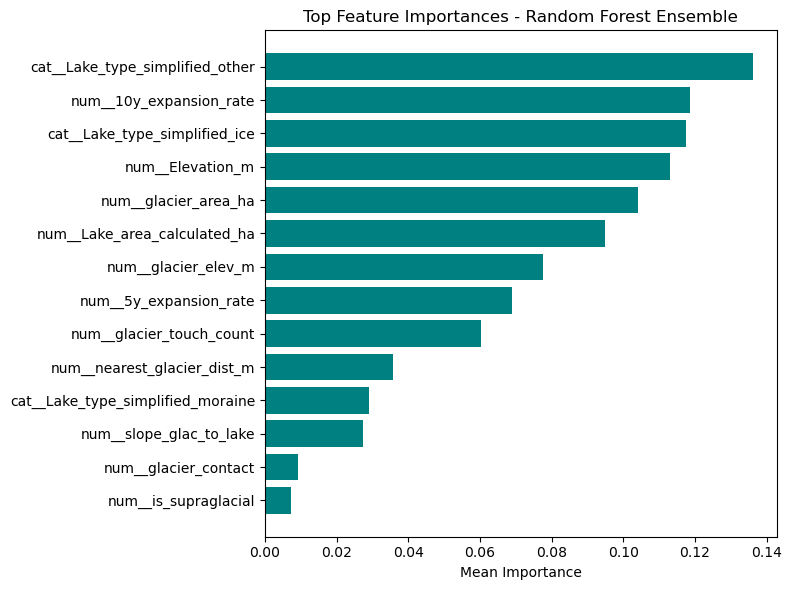

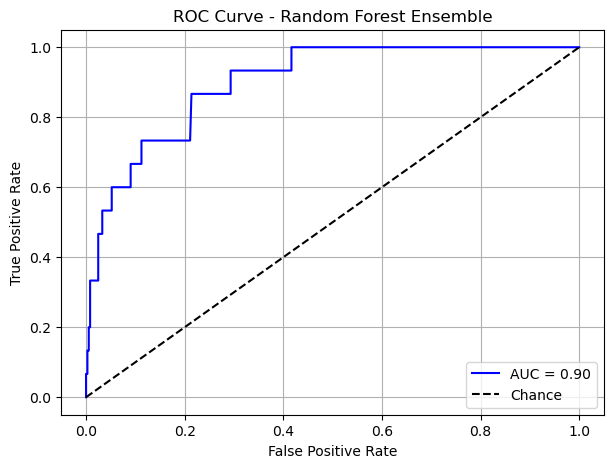


=== Logistic Regression Ensemble: Classification Report ===
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       365
           1       0.19      0.73      0.30        15

    accuracy                           0.87       380
   macro avg       0.59      0.80      0.61       380
weighted avg       0.96      0.87      0.90       380


=== Logistic Regression Ensemble: Confusion Matrix ===
[[318  47]
 [  4  11]]

Logistic Regression Ensemble: ROC-AUC = 0.8438


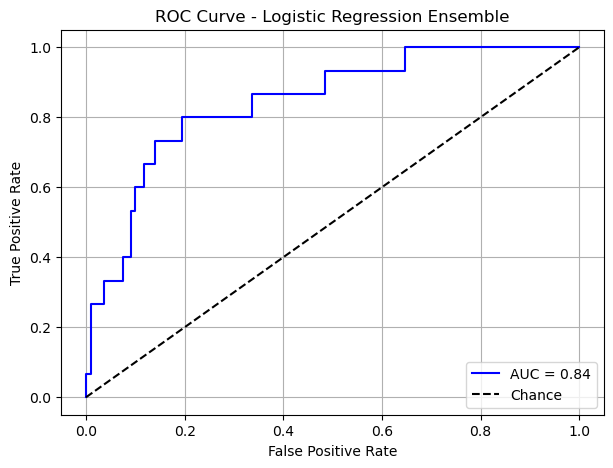


=== XGBoost Ensemble: Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       365
           1       0.20      0.67      0.30        15

    accuracy                           0.88       380
   macro avg       0.59      0.78      0.62       380
weighted avg       0.95      0.88      0.91       380


=== XGBoost Ensemble: Confusion Matrix ===
[[324  41]
 [  5  10]]

XGBoost Ensemble: ROC-AUC = 0.8855

=== XGBoost Ensemble: Mean Feature Importances ===
cat__Lake_type_simplified_other           0.3310
cat__Lake_type_simplified_ice             0.3093
cat__Lake_type_simplified_moraine         0.0966
num__Elevation_m                          0.0501
num__10y_expansion_rate                   0.0407
num__glacier_area_ha                      0.0322
num__glacier_touch_count                  0.0313
num__slope_glac_to_lake                   0.0246
num__Lake_area_calculated_ha              0.0232
num__nearest_glacier_dist_m 

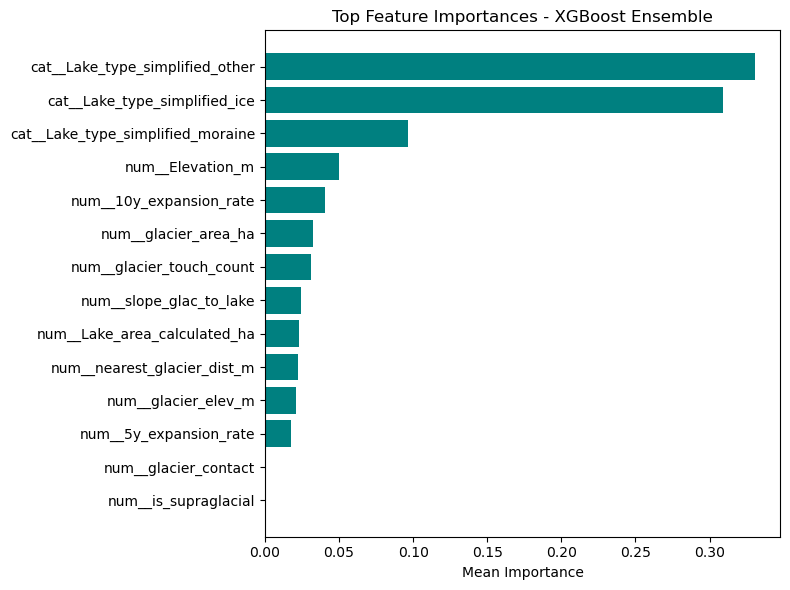

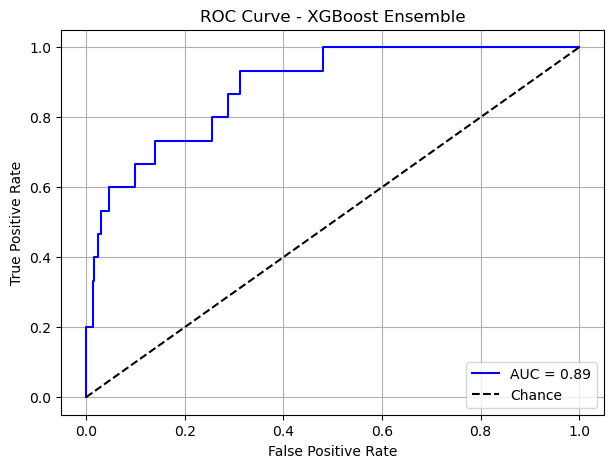

In [108]:
# ----------------------------
# Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# Random Forest Ensemble
# ----------------------------
rf_models = create_ensemble(
    X_train, y_train, n_models=5,
    base_model=RandomForestClassifier()
)
evaluate_ensemble("Random Forest", rf_models, X_test, y_test)


# ----------------------------
# Logistic Regression Ensemble
# ----------------------------
lr_models = create_ensemble(
    X_train, y_train, n_models=5,
    base_model=LogisticRegression(max_iter=1000)
)
evaluate_ensemble("Logistic Regression", lr_models, X_test, y_test)


# ----------------------------
# XGBoost Ensemble
# ----------------------------
xgb_models = create_ensemble(
    X_train, y_train, n_models=5,
    base_model=XGBClassifier(
        eval_metric="logloss"
    )
)
evaluate_ensemble("XGBoost", xgb_models, X_test, y_test)

In [106]:
print(df_comb["GLOF"].value_counts())


GLOF
0    1824
1      73
Name: count, dtype: int64


## Multivariate Imputation by Chained Equations(MICE)

In [3]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, accuracy_score

# ==============================================
# 1. Load Data
# ==============================================
df = pd.read_csv("../CSVs/ml_combined_updated2023.csv")

# Define target column
target = "GLOF"   # change if yours is "Activity" or another name

# Drop unwanted + target
exclude_cols = ["Year_final", "Latitude", "Longitude","Elevation_m", target]
X = df.drop(columns=exclude_cols)
y = df[target]

# Separate categorical & numeric columns
categorical_cols = ["Lake_type_simplified"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Keep only complete rows (CCA subset)
X_cca = X.dropna()

print(f"Original shape: {X.shape}, After CCA: {X_cca.shape}")

# ==============================================
# 2. Artificial Missingness (20%)
# ==============================================
X_masked = X_cca.copy()
rng = np.random.default_rng(42)

# Mask numeric columns
for col in numeric_cols:
    mask = rng.uniform(size=X_cca.shape[0]) < 0.2
    X_masked.loc[mask, col] = np.nan

# Mask categorical column
for col in categorical_cols:
    mask = rng.uniform(size=X_cca.shape[0]) < 0.2
    X_masked.loc[mask, col] = np.nan

# ==============================================
# 3. Define preprocessors
# ==============================================
numeric_transformer = Pipeline(steps=[
    ("imputer", IterativeImputer(random_state=42, max_iter=10))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# ==============================================
# 4. Fit & Transform (Impute)
# ==============================================
X_imputed = preprocessor.fit_transform(X_masked)

# Rebuild imputed dataframe
imputed_feature_names = (
    numeric_cols +
    list(preprocessor.named_transformers_["cat"]["onehot"].get_feature_names_out(categorical_cols))
)
X_imputed = pd.DataFrame(X_imputed, columns=imputed_feature_names, index=X_masked.index)

# ==============================================
# 5. Evaluate Imputation Accuracy
# ==============================================
print("\n===Iterative Imputer==")
print("\n=== Numeric RMSE ===")
for col in numeric_cols:
    missing_mask = X_masked[col].isna()
    if missing_mask.any():
        true_vals = X_cca.loc[missing_mask, col]
        imputed_vals = X_imputed.loc[missing_mask, col]
        rmse = np.sqrt(mean_squared_error(true_vals, imputed_vals))
        print(f"{col}: RMSE = {rmse:.3f}")

print("\n=== Categorical Accuracy ===")
for col in categorical_cols:
    missing_mask = X_masked[col].isna()
    if missing_mask.any():
        # Get the imputed column set for this categorical
        onehot_cols = [c for c in X_imputed.columns if c.startswith(col + "_")]
        imputed_cat = X_imputed.loc[missing_mask, onehot_cols].idxmax(axis=1).str.replace(col + "_", "")
        true_cat = X_cca.loc[missing_mask, col].astype(str)
        acc = accuracy_score(true_cat, imputed_cat)
        print(f"{col}: Accuracy = {acc:.3f}")



Original shape: (2652, 11), After CCA: (1897, 11)

===Iterative Imputer==

=== Numeric RMSE ===
Lake_area_calculated_ha: RMSE = 67.268
is_supraglacial: RMSE = 0.061
glacier_area_ha: RMSE = 5663.121
slope_glac_to_lake: RMSE = 8.958
glacier_contact: RMSE = 0.393
glacier_touch_count: RMSE = 2.507
nearest_glacier_dist_m: RMSE = 1059.611
glacier_elev_m: RMSE = 457.990
5y_expansion_rate: RMSE = 4.654
10y_expansion_rate: RMSE = 4.747

=== Categorical Accuracy ===
Lake_type_simplified: Accuracy = 0.620


### MICE Forest


### Validation and testing

In [4]:
pip install miceforest


Note: you may need to restart the kernel to use updated packages.


MICE with manual masking (each column 20% missing rows:Missing Completely at Random(MCAR))

In [5]:
import pandas as pd
import numpy as np
import miceforest as mf
from sklearn.metrics import mean_squared_error, accuracy_score

# ==============================================
# 1. Load Data
# ==============================================
df = pd.read_csv("../CSVs/uncleaned_ml_combined.csv")

# Define target and excluded columns
target = "GLOF"   # or "Activity"
exclude_cols = ["Year_final", target]

# Features only
X = df.drop(columns=exclude_cols)

# Ensure categorical dtype
X["Lake_type_simplified"] = X["Lake_type_simplified"].astype("category")

# Keep only complete rows (CCA subset) + reset index
X_cca = X.dropna().reset_index(drop=True)
print(f"Original shape: {X.shape}, After CCA: {X_cca.shape}")

# ==============================================
# 2. Artificial Missingness (20%)
# ==============================================
X_masked_manual = X_cca.copy()
rng = np.random.default_rng(42)

for col in X_masked_manual.columns:
    mask = rng.uniform(size=X_masked_manual.shape[0]) < 0.2
    X_masked_manual.loc[mask, col] = np.nan

# ==============================================
# 3. Run miceforest Imputation
# ==============================================
kernel_manual = mf.ImputationKernel(
    X_masked_manual,
    save_all_iterations_data=True,
    random_state=42
)

kernel_manual.mice(iterations=10, n_datasets=5)

X_imputed_manual = kernel_manual.complete_data(
    dataset=0,
    iteration=kernel_manual.iteration_count() - 1
)

# ==============================================
# 4. Evaluate Imputation Accuracy
# ==============================================
print("\n=== Numeric RMSE (Manual) ===")
for col in X_cca.select_dtypes(include=[np.number]).columns:
    missing_mask = X_masked_manual[col].isna().values
    if missing_mask.any():
        true_vals = X_cca.loc[missing_mask, col].values
        imputed_vals = X_imputed_manual.loc[missing_mask, col].values
        rmse = np.sqrt(mean_squared_error(true_vals, imputed_vals))
        print(f"{col}: RMSE = {rmse:.3f}")

print("\n=== Categorical Accuracy (Manual) ===")
for col in X_cca.select_dtypes(include=["category"]).columns:
    missing_mask = X_masked_manual[col].isna().values
    if missing_mask.any():
        true_vals = X_cca.loc[missing_mask, col].astype(str).values
        imputed_vals = X_imputed_manual.loc[missing_mask, col].astype(str).values
        acc = accuracy_score(true_vals, imputed_vals)
        print(f"{col}: Accuracy = {acc:.3f}")




Original shape: (2652, 14), After CCA: (1896, 14)

=== Numeric RMSE (Manual) ===
Longitude: RMSE = 4.649
Latitude: RMSE = 1.358
Lake_area_calculated_ha: RMSE = 75.283
Elevation_m: RMSE = 334.681
is_supraglacial: RMSE = 0.113
glacier_area_ha: RMSE = 13142.513
slope_glac_to_lake: RMSE = 3.299
glacier_contact: RMSE = 0.124
glacier_touch_count: RMSE = 2.236
nearest_glacier_dist_m: RMSE = 823.049
glacier_elev_m: RMSE = 325.775
5y_expansion_rate: RMSE = 5.586
10y_expansion_rate: RMSE = 6.800

=== Categorical Accuracy (Manual) ===
Lake_type_simplified: Accuracy = 0.833


MICE Ampute(20% Missing completely at random(MCAR) data across the dataset, i.e some columns might have no missing rows)

In [6]:
import pandas as pd
import numpy as np
import miceforest as mf
from sklearn.metrics import mean_squared_error, accuracy_score

# ==============================================
# 1. Load Data
# ==============================================
df = pd.read_csv("../CSVs/ml_combined_updated2023.csv")

# Define target and excluded columns
target = "GLOF"   # or "Activity"
exclude_cols = ["Year_final", target]

# Features only
X = df.drop(columns=exclude_cols)

# Ensure categorical dtype
X["Lake_type_simplified"] = X["Lake_type_simplified"].astype("category")

# Keep only complete rows (CCA subset) + reset index
X_cca = X.dropna().reset_index(drop=True)
print(f"Original shape: {X.shape}, After CCA: {X_cca.shape}")

# ==============================================
# 2. Artificial Missingness (20%) with ampute_data
# ==============================================
X_masked_ampute = mf.ampute_data(
    X_cca,
    perc=0.2,
    random_state=42
)

# ==============================================
# 3. Run miceforest Imputation
# ==============================================
kernel_ampute = mf.ImputationKernel(
    X_masked_ampute,
    save_all_iterations_data=True,
    random_state=42
)
kernel_ampute.mice(iterations=10, n_datasets=5)

X_imputed_ampute = kernel_ampute.complete_data(
    dataset=0,
    iteration=kernel_ampute.iteration_count() - 1
)

# ==============================================
# 4. Evaluate Imputation Accuracy
# ==============================================
print("\n=== Numeric RMSE (Ampute) ===")
for col in X_cca.select_dtypes(include=[np.number]).columns:
    missing_mask = X_masked_ampute[col].isna().values
    if missing_mask.any():
        true_vals = X_cca.loc[missing_mask, col].values
        imputed_vals = X_imputed_ampute.loc[missing_mask, col].values
        rmse = np.sqrt(mean_squared_error(true_vals, imputed_vals))
        print(f"{col}: RMSE = {rmse:.3f}")

print("\n=== Categorical Accuracy (Ampute) ===")
for col in X_cca.select_dtypes(include=["category"]).columns:
    missing_mask = X_masked_ampute[col].isna().values
    if missing_mask.any():
        true_vals = X_cca.loc[missing_mask, col].astype(str).values
        imputed_vals = X_imputed_ampute.loc[missing_mask, col].astype(str).values
        acc = accuracy_score(true_vals, imputed_vals)
        print(f"{col}: Accuracy = {acc:.3f}")


Original shape: (2652, 14), After CCA: (1897, 14)

=== Numeric RMSE (Ampute) ===
Longitude: RMSE = 5.179
Latitude: RMSE = 1.866
Lake_area_calculated_ha: RMSE = 109.465
Elevation_m: RMSE = 341.644
is_supraglacial: RMSE = 0.103
glacier_area_ha: RMSE = 8046.701
slope_glac_to_lake: RMSE = 3.668
glacier_contact: RMSE = 0.073
glacier_touch_count: RMSE = 2.727
nearest_glacier_dist_m: RMSE = 796.894
glacier_elev_m: RMSE = 283.090
5y_expansion_rate: RMSE = 5.546
10y_expansion_rate: RMSE = 3.853

=== Categorical Accuracy (Ampute) ===
Lake_type_simplified: Accuracy = 0.836


In [7]:
#install plotnine
!pip install plotnine --quiet

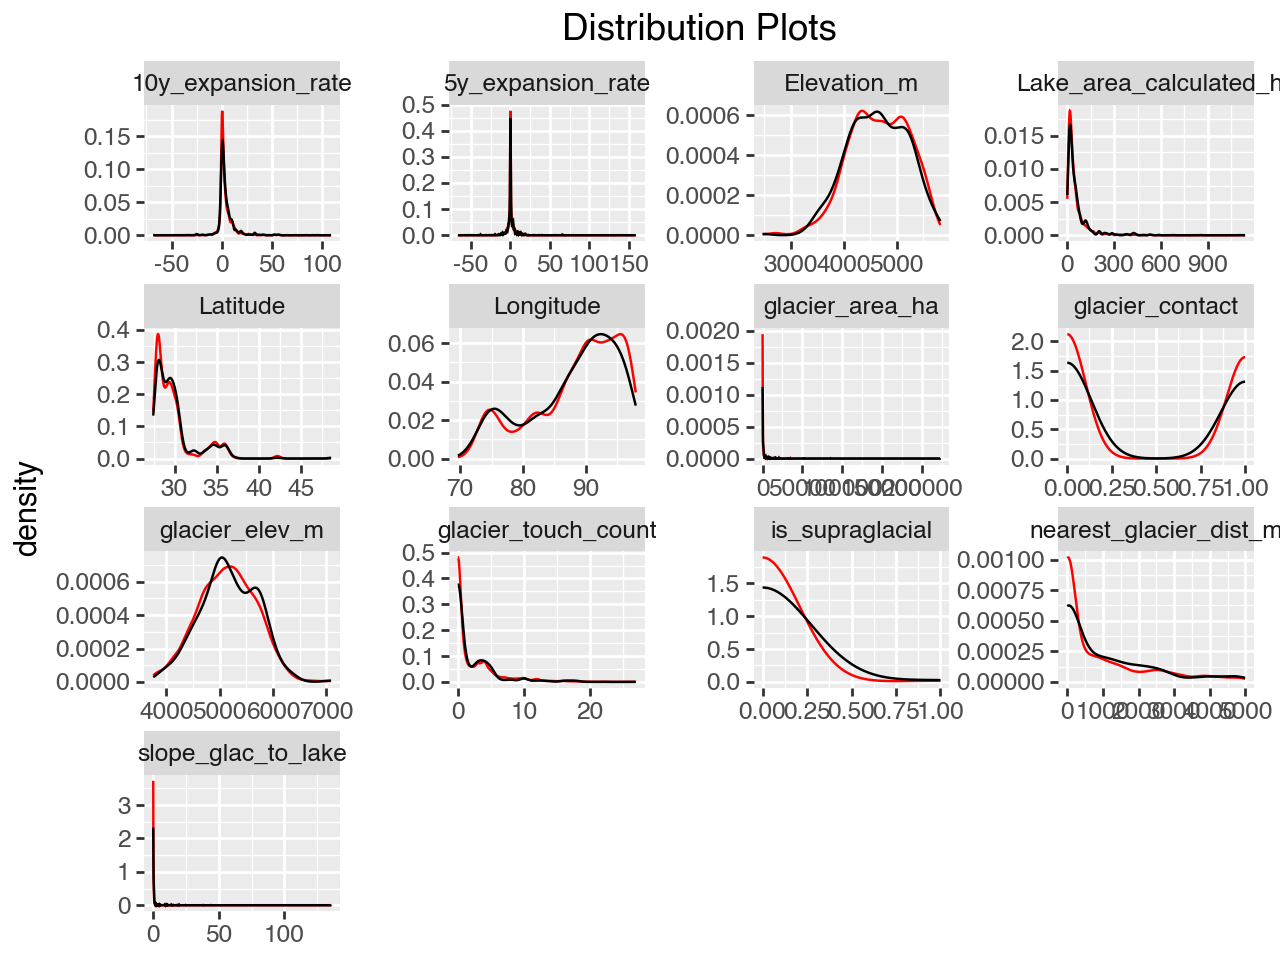

In [8]:
# Plot observed vs imputed distributions: Manual Masking
kernel_manual.plot_imputed_distributions()


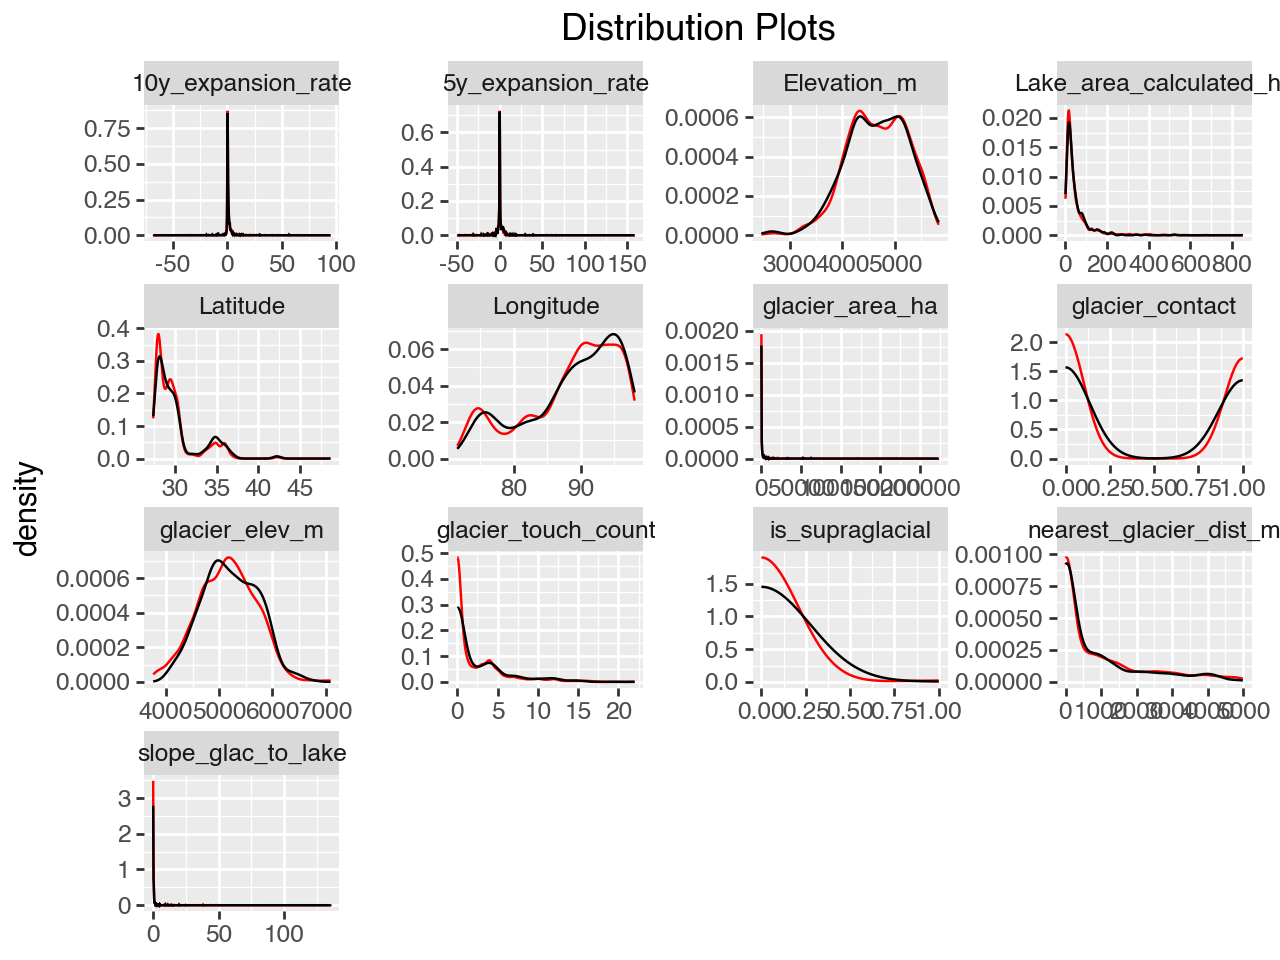

In [9]:
# Plot observed vs imputed distributions: Ampute Masking
!pip install plotnine --quiet
kernel_ampute.plot_imputed_distributions()

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def compare_kde(col, X_true, X_imp_manual=None, X_imp_ampute=None):
    plt.figure(figsize=(8,5))

    # True distribution (from CCA complete cases)
    sns.kdeplot(X_true[col], label="True (Complete Cases)", color="black", lw=2)

    # Manual masking imputations
    if X_imp_manual is not None:
        sns.kdeplot(X_imp_manual[col], label="Imputed (Manual)", color="red", lw=2)

    # Ampute masking imputations
    if X_imp_ampute is not None:
        sns.kdeplot(X_imp_ampute[col], label="Imputed (Ampute)", color="blue", lw=2)

    plt.title(f"Distribution Comparison: {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.show()



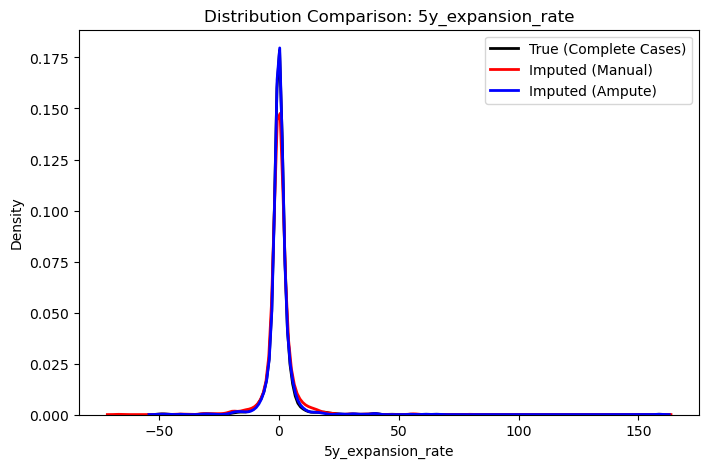

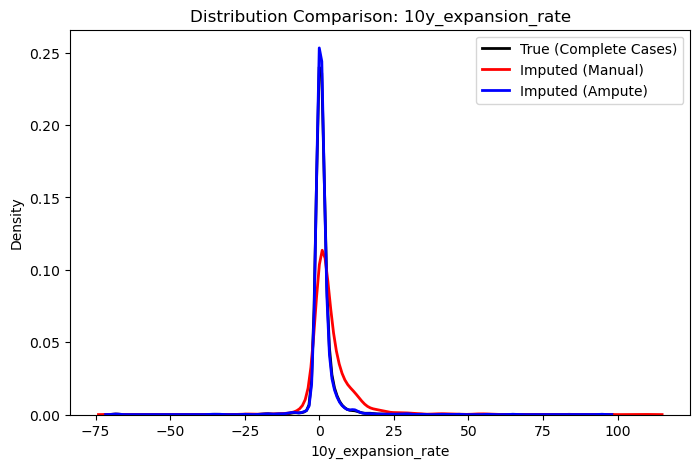

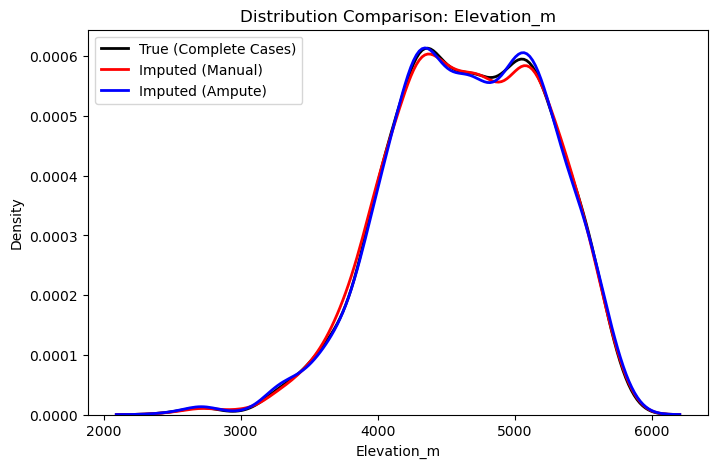

In [11]:
# Compare expansion rate distributions
compare_kde("5y_expansion_rate", X_cca, X_imputed_manual, X_imputed_ampute)
compare_kde("10y_expansion_rate", X_cca, X_imputed_manual, X_imputed_ampute)

# Compare elevation distributions
compare_kde("Elevation_m", X_cca, X_imputed_manual, X_imputed_ampute)


In [12]:
# Basic statistics for each numeric column
desc = X_cca.describe().T  # mean, std, min, max, quartiles
# Add extra columns for range and coefficient of variation
desc["range"] = desc["max"] - desc["min"]
desc["cv"] = desc["std"] / desc["mean"]  # coefficient of variation
print(desc[["mean", "std", "min", "25%", "50%", "75%", "max", "range", "cv"]])


                                mean           std          min          25%  \
Longitude                  88.436418      7.078296    69.639000    83.702000   
Latitude                   29.934846      2.602922    27.420000    28.093000   
Lake_area_calculated_ha    52.139640     81.945828     0.159213    15.249575   
Elevation_m              4663.088561    562.822716  2466.000000  4270.000000   
is_supraglacial             0.010543      0.102163     0.000000     0.000000   
glacier_area_ha          1937.480921  10815.452482     1.038375    12.905867   
slope_glac_to_lake          0.953626      7.131331     0.000000     0.000000   
glacier_contact             0.448076      0.497428     0.000000     0.000000   
glacier_touch_count         2.105957      3.515015     0.000000     0.000000   
nearest_glacier_dist_m    889.716021   1280.312920     0.000000     0.000000   
glacier_elev_m           5155.618345    541.441783  3757.000000  4775.000000   
5y_expansion_rate           0.299670    

In [13]:
X_imputed

Lake_area_calculated_ha  is_supraglacial  glacier_area_ha  \
76                  39.919893         0.000000       435.013897   
80                  44.665782         0.023621       994.237220   
81                   6.503131         0.048835     11626.125067   
83                 116.180830         0.000000       770.247369   
85                   8.971871         0.008100       536.125805   
...                       ...              ...              ...   
2625                10.303073         0.000000      1071.847702   
2626               137.724310         0.000000      7165.168121   
2627                50.540389         0.000000         2.533321   
2628                25.875128        -0.001513       236.098289   
2648                 2.299511        -0.011897         1.836153   

      slope_glac_to_lake  glacier_contact  glacier_touch_count  \
76              6.264120              0.0             0.000000   
80              0.000000              1.0             3.000000   
81              0.000000              1.0             4.000000   
83              0.000000              1.0             2.000000   
85              0.000000              1.0             2.000000   
...                  ...              ...                  ...   
2625            0.000000              1.0             2.000000   
2626            0.000000              1.0            11.000000   
2627            0.000000              1.0             1.000000   
2628           -1.474497              0.0             0.000000   
2648            0.077706              0.0            -0.559401   

      nearest_glacier_dist_m  glacier_elev_m  5y_expansion_rate  \
76                 93.390600     5171.000000           0.460321   
80                  0.000000     5761.000000         -13.971549   
81                  0.000000     5268.815418           0.697769   
83                  0.000000     3944.000000         -15.060845   
85               -364.851589     3985.000000          -9.346181   
...                      ...             ...                ...   
2625                0.000000     4856.000000          -0.523613   
2626                0.000000     5266.000000           1.584899   
2627                0.000000     4924.000000          -0.990300   
2628             3314.375467     5059.894313          -2.405520   
2648             4890.214341     4650.000000          -0.007083   

      10y_expansion_rate  Lake_type_simplified_ice  \
76              5.111276                       0.0   
80            -17.154350                       0.0   
81             -0.333086                       0.0   
83             -5.725896                       0.0   
85              5.705936                       0.0   
...                  ...                       ...   
2625            0.372503                       0.0   
2626            1.727979                       0.0   
2627            3.049739                       0.0   
2628            0.094466                       0.0   
2648            0.334737                       0.0   

      Lake_type_simplified_moraine  Lake_type_simplified_other  
76                             1.0                         0.0  
80                             0.0                         1.0  
81                             0.0                         1.0  
83                             0.0                         1.0  
85                             0.0                         1.0  
...                            ...                         ...  
2625                           0.0                         1.0  
2626                           0.0                         1.0  
2627                           0.0                         1.0  
2628                           0.0                         1.0  
2648                           0.0                         1.0  

[1897 rows x 13 columns]

In [14]:
# Add target back
final_df = X_imputed.copy()
final_df[target] = df.loc[X_imputed.index, target].values
final_df


Lake_area_calculated_ha  is_supraglacial  glacier_area_ha  \
76                  39.919893         0.000000       435.013897   
80                  44.665782         0.023621       994.237220   
81                   6.503131         0.048835     11626.125067   
83                 116.180830         0.000000       770.247369   
85                   8.971871         0.008100       536.125805   
...                       ...              ...              ...   
2625                10.303073         0.000000      1071.847702   
2626               137.724310         0.000000      7165.168121   
2627                50.540389         0.000000         2.533321   
2628                25.875128        -0.001513       236.098289   
2648                 2.299511        -0.011897         1.836153   

      slope_glac_to_lake  glacier_contact  glacier_touch_count  \
76              6.264120              0.0             0.000000   
80              0.000000              1.0             3.000000   
81              0.000000              1.0             4.000000   
83              0.000000              1.0             2.000000   
85              0.000000              1.0             2.000000   
...                  ...              ...                  ...   
2625            0.000000              1.0             2.000000   
2626            0.000000              1.0            11.000000   
2627            0.000000              1.0             1.000000   
2628           -1.474497              0.0             0.000000   
2648            0.077706              0.0            -0.559401   

      nearest_glacier_dist_m  glacier_elev_m  5y_expansion_rate  \
76                 93.390600     5171.000000           0.460321   
80                  0.000000     5761.000000         -13.971549   
81                  0.000000     5268.815418           0.697769   
83                  0.000000     3944.000000         -15.060845   
85               -364.851589     3985.000000          -9.346181   
...                      ...             ...                ...   
2625                0.000000     4856.000000          -0.523613   
2626                0.000000     5266.000000           1.584899   
2627                0.000000     4924.000000          -0.990300   
2628             3314.375467     5059.894313          -2.405520   
2648             4890.214341     4650.000000          -0.007083   

      10y_expansion_rate  Lake_type_simplified_ice  \
76              5.111276                       0.0   
80            -17.154350                       0.0   
81             -0.333086                       0.0   
83             -5.725896                       0.0   
85              5.705936                       0.0   
...                  ...                       ...   
2625            0.372503                       0.0   
2626            1.727979                       0.0   
2627            3.049739                       0.0   
2628            0.094466                       0.0   
2648            0.334737                       0.0   

      Lake_type_simplified_moraine  Lake_type_simplified_other  GLOF  
76                             1.0                         0.0     1  
80                             0.0                         1.0     1  
81                             0.0                         1.0     1  
83                             0.0                         1.0     1  
85                             0.0                         1.0     1  
...                            ...                         ...   ...  
2625                           0.0                         1.0     0  
2626                           0.0                         1.0     0  
2627                           0.0                         1.0     0  
2628                           0.0                         1.0     0  
2648                           0.0                         1.0     0  

[1897 rows x 14 columns]

### MICE implementation

In [15]:

# ==============================================
# Imputation with MICE (miceforest) on full dataset
# With imputation flags for key variables
# ==============================================

import pandas as pd
import numpy as np
import miceforest as mf

# ==============================================
# 1. Load Data
# ==============================================
df = pd.read_csv("../CSVs/ml_combined_updated2023.csv")

# Define target and excluded columns
target = "GLOF"   # or "Activity"
exclude_cols = ["Year_final", target]

# Features only (excluding target + year)
X = df.drop(columns=exclude_cols).copy()

# Ensure categorical dtype
X["Lake_type_simplified"] = X["Lake_type_simplified"].astype("category")

print(f"Original shape: {X.shape}")
print("Missing values (%):")
print(X.isnull().mean() * 100)

# ==============================================
# 2. Run miceforest Imputation (real missingness)
# ==============================================
kernel = mf.ImputationKernel(
    X,
    num_datasets=5,                # <-- Correct parameter
    save_all_iterations_data=True,
    random_state=42
)

# Run MICE: 10 iterations
kernel.mice(iterations=10)

# ==============================================
# 3. Retrieve ALL imputed datasets + add flags
# ==============================================
# Variables to flag (based on your missingness analysis)
flag_vars = [
    "Lake_area_calculated_ha",
    "5y_expansion_rate",
    "10y_expansion_rate",
    "glacier_area_ha",
    "slope_glac_to_lake",
    "nearest_glacier_dist_m",
    "glacier_elev_m",
]

# Store finished datasets in a dictionary
X_imputed_dict = {}
last_iter = kernel.iteration_count() - 1

for d in range(5):   # loop over 0–4
    X_imp = kernel.complete_data(dataset=d, iteration=last_iter).copy()
    
    # Add imputation flags
    for col in flag_vars:
        X_imp[f"is_imputed_{col}"] = X[col].isna().astype(int)
    
    # Reattach target
    X_imp[target] = df[target].values
    
    # Save to dictionary
    X_imputed_dict[d] = X_imp
    print(f"Dataset {d} shape: {X_imp.shape}")

# Example: access dataset 0
X_imputed_0 = X_imputed_dict[0]
print("\nFinal dataset 0 shape:", X_imputed_0.shape)


Original shape: (2652, 14)
Missing values (%):
Longitude                   0.000000
Latitude                    0.000000
Lake_area_calculated_ha     2.337858
Elevation_m                 0.000000
Lake_type_simplified        0.000000
is_supraglacial             0.000000
glacier_area_ha            22.209653
slope_glac_to_lake         22.209653
glacier_contact             0.000000
glacier_touch_count         0.000000
nearest_glacier_dist_m     22.209653
glacier_elev_m             22.209653
5y_expansion_rate           4.374057
10y_expansion_rate          5.542986
dtype: float64
Dataset 0 shape: (2652, 22)
Dataset 1 shape: (2652, 22)
Dataset 2 shape: (2652, 22)
Dataset 3 shape: (2652, 22)
Dataset 4 shape: (2652, 22)

Final dataset 0 shape: (2652, 22)


In [16]:
#Accessing the datasets:
X_imputed_0 = X_imputed_dict[0]
X_imputed_1 = X_imputed_dict[1]
X_imputed_2 = X_imputed_dict[2]
X_imputed_3 = X_imputed_dict[3]
X_imputed_4 = X_imputed_dict[4]





In [17]:
X_imputed_0.head(20)

Longitude  Latitude  Lake_area_calculated_ha  Elevation_m  \
0      74.609    42.522               105.607014         3466   
1      79.846    42.207                23.943856         3269   
2      77.193    35.677               400.437485         4779   
3      83.967    29.307                18.563616         4594   
4      74.633    36.039                 9.146846         3301   
5      76.867    41.975                49.309104         3627   
6      86.586    27.874                33.998853         4368   
7      79.846    42.207                90.814688         3269   
8      74.879    36.414               146.227350         2501   
9      88.027    27.586                27.119526         4437   
10     76.602    42.923                 7.496470         3423   
11     79.846    42.207                90.814688         3269   
12     77.193    35.677               262.299139         4779   
13     79.846    42.207                90.814688         3269   
14     77.193    35.677               238.948054         4779   
15     79.846    42.207                90.814688         3269   
16     78.332    31.295               146.858316         4589   
17     74.609    42.522                87.429171         3466   
18     74.505    42.505                39.349776         3343   
19     83.868    29.288                33.998853         5372   

   Lake_type_simplified  is_supraglacial  glacier_area_ha  slope_glac_to_lake  \
0                 other                0       536.125805            0.000000   
1                   ice                0       396.118156            2.959854   
2                   ice                0      9444.515664            0.718550   
3                 other                0         4.471094            0.096926   
4                 other                0      6998.712273            0.000000   
5               moraine                0        38.457305            0.418800   
6               moraine                0       652.480729            0.000000   
7                   ice                0       396.118156            2.959854   
8                 other                0      2339.676629            9.981328   
9                 other                0     29403.154647            0.000000   
10              moraine                0         4.939868            0.747456   
11                  ice                0       396.118156            2.959854   
12                  ice                0      9444.515664            0.718550   
13                  ice                0       396.118156            2.959854   
14                  ice                0      9444.515664            0.718550   
15                  ice                0       396.118156            2.959854   
16                other                0      2174.177552            0.000000   
17              moraine                0       536.125805            0.000000   
18              moraine                0        34.901537            0.451534   
19              moraine                0       172.765070            0.000000   

    glacier_contact  glacier_touch_count  ...  5y_expansion_rate  \
0                 1                    2  ...          -6.885644   
1                 0                    0  ...         -31.058741   
2                 0                    0  ...          23.958109   
3                 0                    0  ...           0.015565   
4                 1                    3  ...          -3.863638   
5                 0                    0  ...          -0.222248   
6                 1                    2  ...           0.871439   
7                 0                    0  ...         -27.278907   
8                 0                    0  ...           8.125940   
9                 1                    4  ...          -0.188286   
10                0                    0  ...          -0.551045   
11                0                    0  ...         -31.842738   
12                0                    0  ...       

### Pipeline with imputation flags

In [18]:
# ==============================================
# MICE-Imputed Pipeline Setup (WITH imputation flags)
# ==============================================
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Features and Target
X_MICE_with_flags = X_imputed_0.drop("GLOF", axis=1)   # <- df_MICE is your completed dataset from MICE
y_MICE_with_flags = X_imputed_0["GLOF"]

# Define categorical + numerical features
cat_features_with_flags = ["Lake_type_simplified"]
exclude_cols_with_flags = cat_features_with_flags + ["Year_final", "Latitude", "Longitude"]
num_features_with_flags = [col for col in X_MICE_with_flags.columns if col not in exclude_cols_with_flags]

# Preprocessing pipeline
preprocessor_MICE_with_flags = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features_with_flags),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features_with_flags)
    ]
)



=== Logistic Regression (WITH Imputation Flags) ===
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       483
           1       0.72      0.79      0.75        48

    accuracy                           0.95       531
   macro avg       0.85      0.88      0.86       531
weighted avg       0.96      0.95      0.95       531

Confusion Matrix:
[[468  15]
 [ 10  38]]
ROC-AUC = 0.9603

=== Random Forest (WITH Imputation Flags) ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       483
           1       0.97      0.75      0.85        48

    accuracy                           0.98       531
   macro avg       0.97      0.87      0.92       531
weighted avg       0.98      0.98      0.97       531

Confusion Matrix:
[[482   1]
 [ 12  36]]
ROC-AUC = 0.9440

=== Gradient Boosting (WITH Imputation Flags) ===
              precision    recall  f1-score   support

           0       0.98 

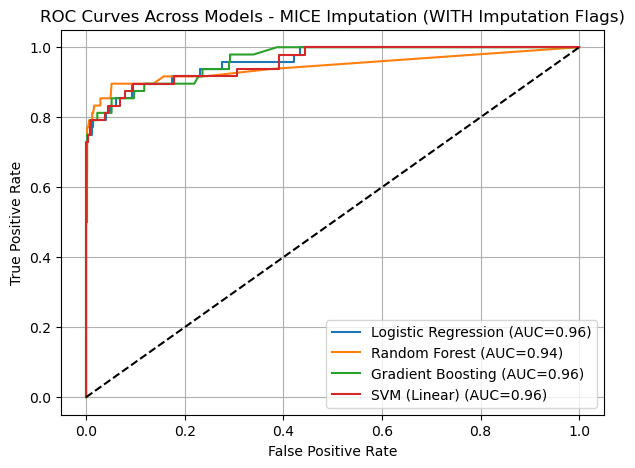

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import numpy as np

# ===================================================
# Helper function to evaluate a model (WITH imputation flags)
# ===================================================
def evaluate_model_with_flags(name, model, X_train, X_test, y_train, y_test, preprocessor):
    # Build pipeline
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    
    # Fit
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    y_probas = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else None
    
    # Classification Report
    print(f"\n=== {name} (WITH Imputation Flags) ===")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # ROC-AUC
    if y_probas is not None:
        auc_score = roc_auc_score(y_test, y_probas)
        print(f"ROC-AUC = {auc_score:.4f}")
        
        # Plot ROC
        fpr, tpr, _ = roc_curve(y_test, y_probas)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.2f})")

# ===================================================
# Train-test split (WITH imputation flags)
# ===================================================
from sklearn.model_selection import train_test_split
X_train_flags, X_test_flags, y_train_flags, y_test_flags = train_test_split(
    X_MICE_with_flags, y_MICE_with_flags, test_size=0.2, random_state=42, stratify=y_MICE_with_flags
)

# ===================================================
# Try multiple classifiers (WITH imputation flags)
# ===================================================
plt.figure(figsize=(7,5))

evaluate_model_with_flags("Logistic Regression", LogisticRegression(max_iter=1000, class_weight="balanced"),
               X_train_flags, X_test_flags, y_train_flags, y_test_flags, preprocessor_MICE_with_flags)

evaluate_model_with_flags("Random Forest", RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42),
               X_train_flags, X_test_flags, y_train_flags, y_test_flags, preprocessor_MICE_with_flags)

evaluate_model_with_flags("Gradient Boosting", GradientBoostingClassifier(),
               X_train_flags, X_test_flags, y_train_flags, y_test_flags, preprocessor_MICE_with_flags)

evaluate_model_with_flags("SVM (Linear)", SVC(probability=True, kernel="linear", class_weight="balanced", random_state=42),
               X_train_flags, X_test_flags, y_train_flags, y_test_flags, preprocessor_MICE_with_flags)

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Across Models - MICE Imputation (WITH Imputation Flags)")
plt.legend()
plt.grid(True)
plt.show()


### Pipeline without imputation flags


In [44]:
# ==============================================
# MICE-Imputed Pipeline Setup (WITHOUT imputation flags)
# ==============================================

# Features and Target
X_MICE_no_flags = X_imputed_0.drop("GLOF", axis=1)   # <- df_MICE is your completed dataset from MICE
y_MICE_no_flags = X_imputed_0["GLOF"]

# Define categorical + numerical features
cat_features_no_flags = ["Lake_type_simplified"]
exclude_cols_no_flags = cat_features_no_flags + [
    "Year_final",
    "Latitude",
    "Longitude",
    "is_imputed_Lake_area_calculated_ha",
    "is_imputed_5y_expansion_rate",
    "is_imputed_10y_expansion_rate",
    "is_imputed_glacier_area_ha",
    "is_imputed_slope_glac_to_lake",
    "is_imputed_nearest_glacier_dist_m",
    "is_imputed_glacier_elev_m"
]
num_features_no_flags = [col for col in X_MICE_no_flags.columns if col not in exclude_cols_no_flags]

# Preprocessing pipeline
preprocessor_MICE_no_flags = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features_no_flags),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features_no_flags)
    ]
)




=== Logistic Regression (WITHOUT Imputation Flags) ===
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       483
           1       0.49      0.79      0.61        48

    accuracy                           0.91       531
   macro avg       0.74      0.86      0.78       531
weighted avg       0.93      0.91      0.92       531

Confusion Matrix:
[[444  39]
 [ 10  38]]
ROC-AUC = 0.9175

=== Random Forest (WITHOUT Imputation Flags) ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       483
           1       1.00      0.60      0.75        48

    accuracy                           0.96       531
   macro avg       0.98      0.80      0.87       531
weighted avg       0.97      0.96      0.96       531

Confusion Matrix:
[[483   0]
 [ 19  29]]
ROC-AUC = 0.9331

=== Gradient Boosting (WITHOUT Imputation Flags) ===
              precision    recall  f1-score   support

           0   

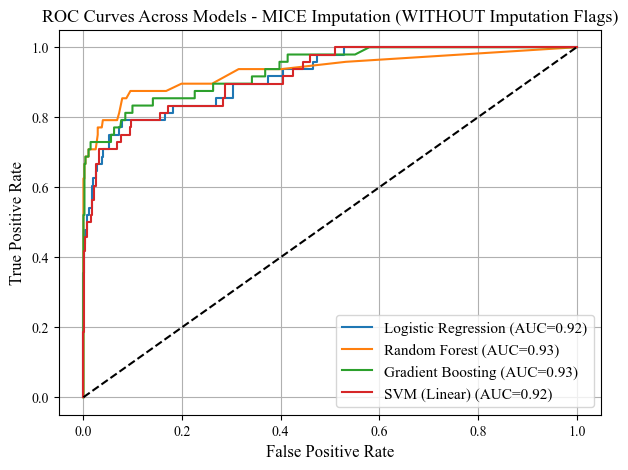

In [45]:
# ===================================================
# Helper function to evaluate a model (WITHOUT imputation flags)
# ===================================================
def evaluate_model_without_flags(name, model, X_train, X_test, y_train, y_test, preprocessor):
    # Build pipeline
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    
    # Fit
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    y_probas = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else None
    
    # Classification Report
    print(f"\n=== {name} (WITHOUT Imputation Flags) ===")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # ROC-AUC
    if y_probas is not None:
        auc_score = roc_auc_score(y_test, y_probas)
        print(f"ROC-AUC = {auc_score:.4f}")
        
        # Plot ROC
        fpr, tpr, _ = roc_curve(y_test, y_probas)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.2f})")


# ===================================================
# Train-test split (WITHOUT imputation flags)
# ===================================================
X_train_no_flags, X_test_no_flags, y_train_no_flags, y_test_no_flags = train_test_split(
    X_MICE_no_flags, y_MICE_no_flags, test_size=0.2, random_state=42, stratify=y_MICE_no_flags
)

# ===================================================
# Try multiple classifiers (WITHOUT imputation flags)
# ===================================================
plt.figure(figsize=(7,5))

evaluate_model_without_flags("Logistic Regression", LogisticRegression(max_iter=1000, class_weight="balanced"),
               X_train_no_flags, X_test_no_flags, y_train_no_flags, y_test_no_flags, preprocessor_MICE_no_flags)

evaluate_model_without_flags("Random Forest", RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42),
               X_train_no_flags, X_test_no_flags, y_train_no_flags, y_test_no_flags, preprocessor_MICE_no_flags)

evaluate_model_without_flags("Gradient Boosting", GradientBoostingClassifier(),
               X_train_no_flags, X_test_no_flags, y_train_no_flags, y_test_no_flags, preprocessor_MICE_no_flags)

evaluate_model_without_flags("SVM (Linear)", SVC(probability=True, kernel="linear", class_weight="balanced", random_state=42),
               X_train_no_flags, X_test_no_flags, y_train_no_flags, y_test_no_flags, preprocessor_MICE_no_flags)

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Across Models - MICE Imputation (WITHOUT Imputation Flags)")
plt.legend()
plt.grid(True)
plt.show()



=== Logistic Regression (WITHOUT Imputation Flags) ===
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       483
           1       0.49      0.79      0.61        48

    accuracy                           0.91       531
   macro avg       0.74      0.86      0.78       531
weighted avg       0.93      0.91      0.92       531

Confusion Matrix:
[[444  39]
 [ 10  38]]
ROC-AUC = 0.9175

=== Random Forest (WITHOUT Imputation Flags) ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       483
           1       1.00      0.60      0.75        48

    accuracy                           0.96       531
   macro avg       0.98      0.80      0.87       531
weighted avg       0.97      0.96      0.96       531

Confusion Matrix:
[[483   0]
 [ 19  29]]
ROC-AUC = 0.9331

=== Gradient Boosting (WITHOUT Imputation Flags) ===
              precision    recall  f1-score   support

           0   

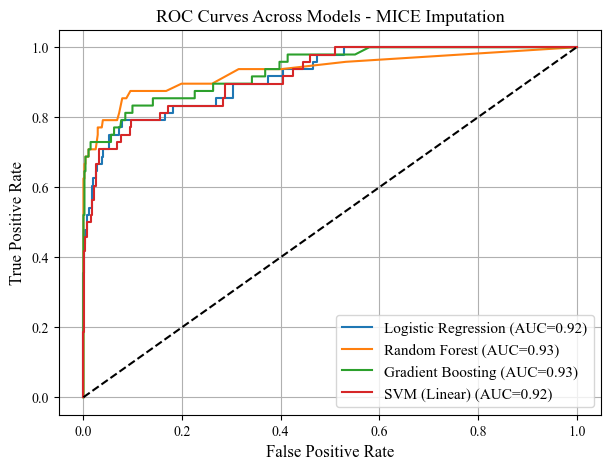

In [46]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set global font to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['axes.titlesize'] = 13
rcParams['axes.labelsize'] = 12
rcParams['legend.fontsize'] = 11
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
plt.figure(figsize=(7,5))

evaluate_model_without_flags("Logistic Regression", LogisticRegression(max_iter=1000, class_weight="balanced"),
               X_train_no_flags, X_test_no_flags, y_train_no_flags, y_test_no_flags, preprocessor_MICE_no_flags)

evaluate_model_without_flags("Random Forest", RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42),
               X_train_no_flags, X_test_no_flags, y_train_no_flags, y_test_no_flags, preprocessor_MICE_no_flags)

evaluate_model_without_flags("Gradient Boosting", GradientBoostingClassifier(),
               X_train_no_flags, X_test_no_flags, y_train_no_flags, y_test_no_flags, preprocessor_MICE_no_flags)

evaluate_model_without_flags("SVM (Linear)", SVC(probability=True, kernel="linear", class_weight="balanced", random_state=42),
               X_train_no_flags, X_test_no_flags, y_train_no_flags, y_test_no_flags, preprocessor_MICE_no_flags)

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Across Models - MICE Imputation")
plt.legend()
plt.grid(True)
plt.show()


### Model Evaluation and Hyperparameter Tuning

In [61]:
# ===================================================
# Cross-validation comparison across models(base)
# ===================================================
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "LogReg": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "RF": RandomForestClassifier(n_estimators=300, class_weight="balanced", random_state=42),
    "GB": GradientBoostingClassifier(random_state=42),
    "SVMlin": SVC(probability=True, kernel="linear", class_weight="balanced", random_state=42),
}

def cv_eval(name, model):
    pipe = Pipeline([("pre", preprocessor_MICE_no_flags), ("clf", model)])
    scores = cross_validate(
        pipe,
        X_MICE_no_flags, y_MICE_no_flags,
        cv=cv,
        scoring={
            "recall": "recall",
            "precision": "precision",
            "roc_auc": "roc_auc",
            "f1": "f1",
            "accuracy": "accuracy"
        },
        n_jobs=-1, return_train_score=False
    )

    print(f"{name}: "
          f"Precision={scores['test_precision'].mean():.3f}±{scores['test_precision'].std():.3f} | "
          f"Recall={scores['test_recall'].mean():.3f}±{scores['test_recall'].std():.3f} | "
          f"AUC={scores['test_roc_auc'].mean():.3f}±{scores['test_roc_auc'].std():.3f} | "
          f"F1={scores['test_f1'].mean():.3f}±{scores['test_f1'].std():.3f} | "
          f"Acc={scores['test_accuracy'].mean():.3f}±{scores['test_accuracy'].std():.3f}")

for n, m in models.items():
    cv_eval(n, m)


LogReg: Precision=0.424±0.031 | Recall=0.829±0.104 | AUC=0.941±0.034 | F1=0.560±0.049 | Acc=0.882±0.010
RF: Precision=0.912±0.062 | Recall=0.667±0.127 | AUC=0.966±0.017 | F1=0.766±0.098 | Acc=0.964±0.013
GB: Precision=0.907±0.068 | Recall=0.676±0.089 | AUC=0.963±0.016 | F1=0.772±0.072 | Acc=0.964±0.010
SVMlin: Precision=0.470±0.037 | Recall=0.825±0.099 | AUC=0.940±0.034 | F1=0.599±0.054 | Acc=0.900±0.011


Exception ignored in: <function ResourceTracker.__del__ at 0x1050f9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104e05bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102c35bc0>
Traceback (most recent call last

In [54]:
# ==============================================
# Hyperparameter tuning for Logistic Regression (NO imputation flags)
# ==============================================
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lg = Pipeline([
    ("pre", preprocessor_MICE_no_flags),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42))
])

param_grid = {
    "clf__C": [0.01, 0.1, 1, 5, 10],
    "clf__penalty": ["l2"],   # 'l1' works only with liblinear/saga
    "clf__solver": ["liblinear", "lbfgs", "saga"]
}

grid_lg = GridSearchCV(
    pipe_lg,
    param_grid,
    scoring="recall",   # prioritize detecting hazardous lakes
    cv=5,
    n_jobs=-1
)

grid_lg.fit(X_MICE_no_flags, y_MICE_no_flags)

print("Best Parameters:", grid_lg.best_params_)
print(f"Best Mean Recall (CV): {grid_lg.best_score_:.3f}")

logreg_tuned = grid_lg.best_estimator_

Best Parameters: {'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best Mean Recall (CV): 0.826


In [ ]:
evaluate_model_without_flags(
    "Tuned Logistic Regression",
    grid_lg.best_estimator_.named_steps["clf"],
    X_train_no_flags, X_test_no_flags,
    y_train_no_flags, y_test_no_flags,
    preprocessor_MICE_no_flags
)

In [55]:
# Gradient Boosting (Tuned)
pipe_gb = Pipeline([
    ("pre", preprocessor_MICE_no_flags),
    ("clf", GradientBoostingClassifier(random_state=42))
])

param_grid_gb = {
    "clf__n_estimators": [100, 200],
    "clf__learning_rate": [0.05, 0.1],
    "clf__max_depth": [2, 3],
    "clf__min_samples_split": [2, 5],
    "clf__min_samples_leaf": [1, 2]
}

grid_gb = GridSearchCV(
    pipe_gb,
    param_grid_gb,
    scoring="recall",
    cv=5,
    n_jobs=-1
)
grid_gb.fit(X_MICE_no_flags, y_MICE_no_flags)

print("Best Parameters (GB):", grid_gb.best_params_)
print(f"Best Mean Recall (CV): {grid_gb.best_score_:.3f}")

gb_tuned = grid_gb.best_estimator_


Best Parameters (GB): {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Best Mean Recall (CV): 0.734


In [63]:
evaluate_model_without_flags(
    "Tuned Gradient Boosting",
    grid_gb.best_estimator_.named_steps["clf"],
    X_train_no_flags, X_test_no_flags,
    y_train_no_flags, y_test_no_flags,
    preprocessor_MICE_no_flags
)



=== Tuned Gradient Boosting (WITHOUT Imputation Flags) ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       483
           1       1.00      0.65      0.78        48

    accuracy                           0.97       531
   macro avg       0.98      0.82      0.88       531
weighted avg       0.97      0.97      0.96       531

Confusion Matrix:
[[483   0]
 [ 17  31]]
ROC-AUC = 0.9270


Exception ignored in: <function ResourceTracker.__del__ at 0x103469bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10326dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1026adbc0>
Traceback (most recent call last

In [64]:
# ===================================================
# Hyperparameter tuning for Random Forest (NO imputation flags)
# ===================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# --- Build pipeline ---
pipe_rf = Pipeline([
    ("pre", preprocessor_MICE_no_flags),
    ("clf", RandomForestClassifier(random_state=42))
])

# --- Parameter grid ---
param_grid_rf = {
    "clf__n_estimators": [100, 200],
    "clf__max_depth": [10, None],
    "clf__min_samples_split": [2, 5],
    "clf__min_samples_leaf": [1, 2],
    "clf__max_features": ["sqrt"],
    "clf__bootstrap": [True],
}

grid_rf = GridSearchCV(
    pipe_rf,
    param_grid_rf,
    scoring="recall",
    cv=5,
    n_jobs=-1,
    verbose=0   # set to 0 for no output, or 1 for minimal progress
)


# --- Fit on data ---
grid_rf.fit(X_MICE_no_flags, y_MICE_no_flags)

# --- Results ---
print("Best Parameters:", grid_rf.best_params_)
print(f"Best Mean Recall (CV): {grid_rf.best_score_:.3f}")

rf_tuned = grid_rf.best_estimator_


Best Parameters: {'clf__bootstrap': True, 'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Best Mean Recall (CV): 0.739


In [29]:
# --- Evaluate best model ---
evaluate_model_without_flags(
    "Tuned Random Forest",
    grid_rf.best_estimator_.named_steps["clf"],
    X_train_no_flags, X_test_no_flags,
    y_train_no_flags, y_test_no_flags,
    preprocessor_MICE_no_flags,
)


=== Tuned Random Forest (WITHOUT Imputation Flags) ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       483
           1       0.97      0.62      0.76        48

    accuracy                           0.96       531
   macro avg       0.97      0.81      0.87       531
weighted avg       0.96      0.96      0.96       531

Confusion Matrix:
[[482   1]
 [ 18  30]]
ROC-AUC = 0.9203


In [57]:
# ==============================================
# Hyperparameter tuning for SVM (NO imputation flags)
# ==============================================
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Build SVM pipeline
pipe_svm = Pipeline([
    ("pre", preprocessor_MICE_no_flags),
    ("clf", SVC(probability=True, class_weight="balanced", random_state=42))
])

# Define parameter grid
param_grid_svm = {
    "clf__C": [0.01, 0.1, 1, 10, 100],       # Regularization strength
    "clf__kernel": ["linear", "rbf"],        # Linear and Radial Basis Function kernels
    "clf__gamma": ["scale", "auto"]          # Kernel coefficient (relevant for RBF)
}

# Initialize grid search
grid_svm = GridSearchCV(
    pipe_svm,
    param_grid_svm,
    scoring="recall",     # prioritize detecting GLOF-prone lakes
    cv=5,
    n_jobs=-1
)

# Fit the grid search
grid_svm.fit(X_MICE_no_flags, y_MICE_no_flags)

# Print best parameters and performance
print("Best Parameters:", grid_svm.best_params_)
print(f"Best Mean Recall (CV): {grid_svm.best_score_:.3f}")

svm_tuned = grid_svm.best_estimator_


Best Parameters: {'clf__C': 0.01, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
Best Mean Recall (CV): 0.892


In [50]:
# --- Evaluate best model ---
evaluate_model_without_flags(
    "SVM (Linear)",
    grid_rf.best_estimator_.named_steps["clf"],
    X_train_no_flags, X_test_no_flags,
    y_train_no_flags, y_test_no_flags,
    preprocessor_MICE_no_flags,
)


=== SVM (Linear) (WITHOUT Imputation Flags) ===
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       483
           1       0.97      0.62      0.76        48

    accuracy                           0.96       531
   macro avg       0.97      0.81      0.87       531
weighted avg       0.96      0.96      0.96       531

Confusion Matrix:
[[482   1]
 [ 18  30]]
ROC-AUC = 0.9203


Exception ignored in: <function ResourceTracker.__del__ at 0x1054b1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102831bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1068ddbc0>
Traceback (most recent call last

### Run 5-fold cross-validation to compare tuned models

In [65]:
# ============================================================
# Cross-validation comparison (5-fold) across tuned models
# ============================================================
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
import pandas as pd

# Dictionary of tuned models
models = {
    "LogReg": logreg_tuned,
    "RF": grid_rf.best_estimator_,
    "GB": gb_tuned,
    "SVM": svm_tuned
}

# Stratified K-Fold for class balance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define metrics to compute
metrics = ["precision", "recall", "f1", "roc_auc", "accuracy"]

cv_results = {}

for name, model in models.items():
    scores = {}
    for m in metrics:
        score = cross_val_score(model, X_MICE_no_flags, y_MICE_no_flags, cv=cv, scoring=m)
        scores[m] = (np.mean(score), np.std(score))
    cv_results[name] = {f"{m}_mean": scores[m][0] for m in metrics} | \
                       {f"{m}_std": scores[m][1] for m in metrics}

# Create a formatted dataframe
cv_df = pd.DataFrame(cv_results).T.round(3)
cv_df = cv_df.sort_values("f1_mean", ascending=False)

# Display neatly
pd.set_option("display.max_columns", None)
print("\nCross-Validation Performance (5-fold):")
display(cv_df)





Cross-Validation Performance (5-fold):


precision_mean  recall_mean  f1_mean  roc_auc_mean  accuracy_mean  \
RF               0.916        0.738    0.816         0.967          0.970   
GB               0.910        0.697    0.786         0.965          0.966   
LogReg           0.382        0.829    0.522         0.931          0.863   
SVM              0.265        0.904    0.409         0.917          0.759   

        precision_std  recall_std  f1_std  roc_auc_std  accuracy_std  
RF              0.058       0.088   0.072        0.017         0.011  
GB              0.067       0.089   0.070        0.014         0.010  
LogReg          0.024       0.098   0.038        0.037         0.010  
SVM             0.029       0.068   0.035        0.035         0.044

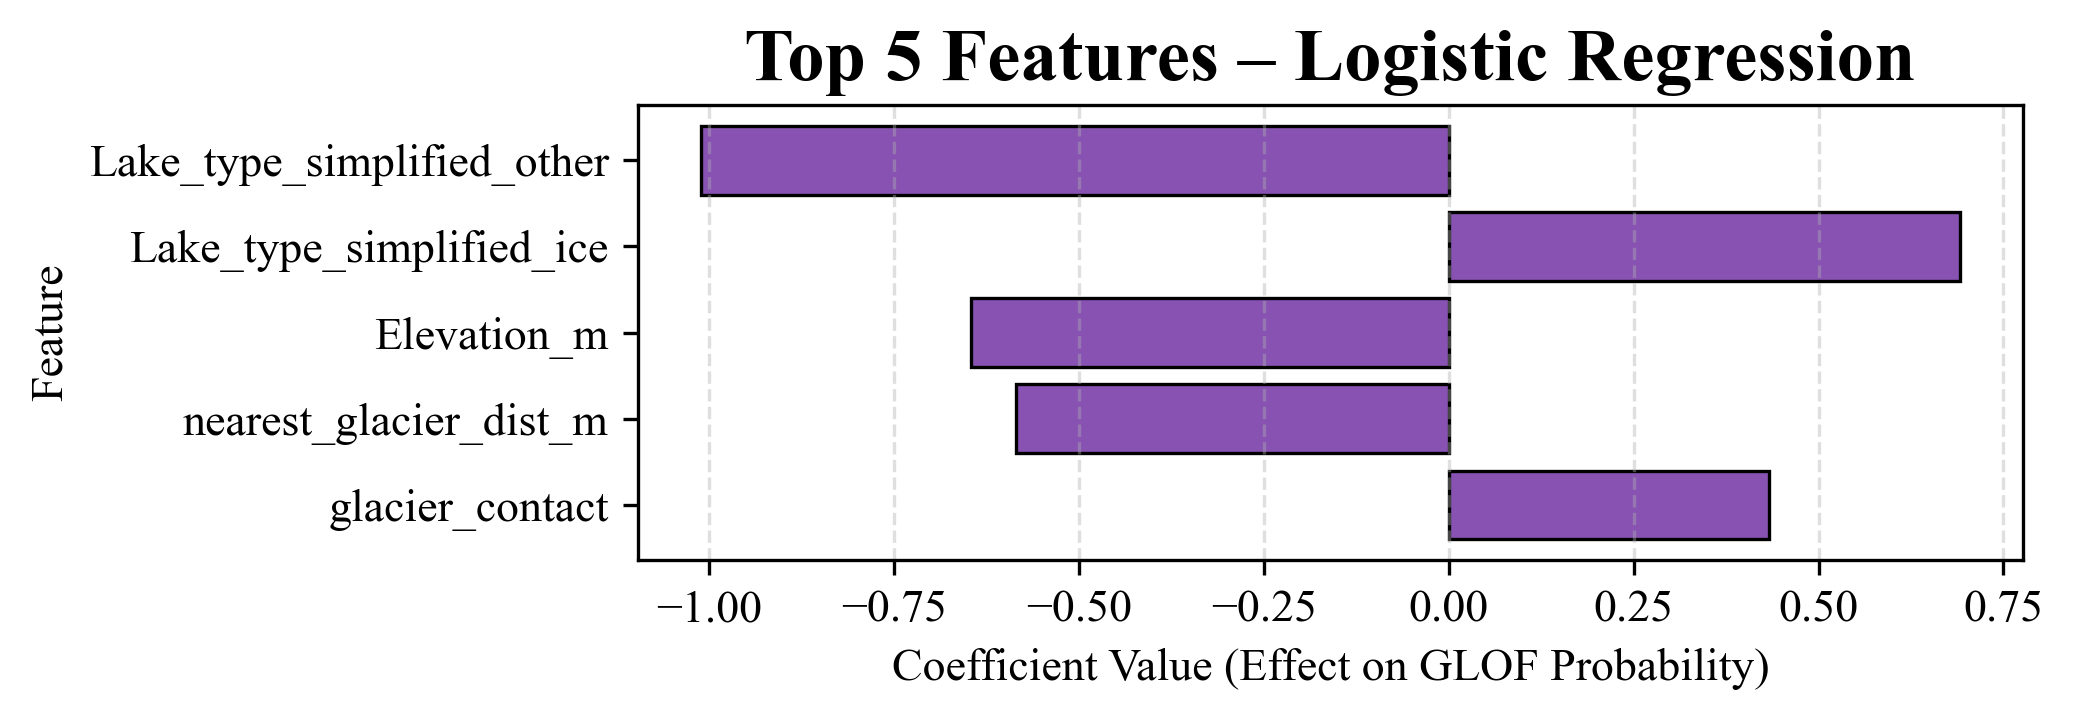

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Clean up feature names for clarity
coef_df["Feature"] = (
    coef_df["Feature"]
    .str.replace("num__", "", regex=False)
    .str.replace("cat__", "", regex=False)
)

# --- Create high-resolution figure ---
plt.figure(figsize=(7, 2.5), dpi=300)   # <-- 300–600 dpi = publication quality

plt.barh(
    coef_df["Feature"][:5],
    coef_df["Coefficient"][:5],
    color="#8852b2",                  # consistent purple
    edgecolor="black",
    linewidth=0.8,
    antialiased=True                  # smoother edges
)

plt.gca().invert_yaxis()
plt.xlabel("Coefficient Value (Effect on GLOF Probability)", fontname="Times New Roman", fontsize=11)
plt.ylabel("Feature", fontname="Times New Roman", fontsize=11)
plt.title("Top 5 Features – Logistic Regression", fontname="Times New Roman", fontsize=18, fontweight="bold")
plt.xticks(fontname="Times New Roman", fontsize=11)
plt.yticks(fontname="Times New Roman", fontsize=11)
plt.grid(axis="x", linestyle="--", alpha=0.4)

# Tight layout for poster alignment
plt.tight_layout()

# --- Save high-quality image ---
plt.savefig("LogReg_FeatureImportance_Poster.png", dpi=600, bbox_inches="tight", transparent=True)
plt.show()


### Retrain Final Tuned Model on Full Dataset

In [76]:
# Retrain final tuned model on full dataset
final_lg = grid_lg.best_estimator_

# Fit model on the entire dataset (training + test combined)
final_lg.fit(X_MICE_no_flags, y_MICE_no_flags)

print(" Final model retrained on full dataset.")


 Final model retrained on full dataset.


In [80]:
# ===================================================
# Generate final hazard probabilities for all lakes
# ===================================================
hazard_df = X_imputed_dict[0].copy()   # use the first fully imputed dataset
X_final = hazard_df.drop(columns=["GLOF"])

# Predict hazard probabilities
hazard_df["Hazard_Prob"] = final_lg.predict_proba(X_final)[:, 1]

print("Added Hazard_Prob column to imputed dataset.")
hazard_df.head()


Added Hazard_Prob column to imputed dataset.


Longitude  Latitude  Lake_area_calculated_ha  Elevation_m  \
0     74.609    42.522               105.607014         3466   
1     79.846    42.207                23.943856         3269   
2     77.193    35.677               400.437485         4779   
3     83.967    29.307                18.563616         4594   
4     74.633    36.039                 9.146846         3301   

  Lake_type_simplified  is_supraglacial  glacier_area_ha  slope_glac_to_lake  \
0                other                0       536.125805            0.000000   
1                  ice                0       396.118156            2.959854   
2                  ice                0      9444.515664            0.718550   
3                other                0         4.471094            0.096926   
4                other                0      6998.712273            0.000000   

   glacier_contact  glacier_touch_count  nearest_glacier_dist_m  \
0                1                    2                0.000000   
1                0                    0              446.305779   
2                0                    0             1036.810675   
3                0                    0              746.281108   
4                1                    3                0.000000   

   glacier_elev_m  5y_expansion_rate  10y_expansion_rate  \
0          3985.0          -6.885644           -0.028777   
1          4590.0         -31.058741           -5.955138   
2          5524.0          23.958109           17.357342   
3          5118.0           0.015565           -0.231160   
4          4575.0          -3.863638            5.277245   

   is_imputed_Lake_area_calculated_ha  is_imputed_5y_expansion_rate  \
0                                   1                             1   
1                                   1                             1   
2                                   1                             1   
3                                   1                             1   
4                                   1                             1   

   is_imputed_10y_expansion_rate  is_imputed_glacier_area_ha  \
0                              1                           0   
1                              1                           0   
2                              1                           0   
3                              1                           1   
4                              1                           0   

   is_imputed_slope_glac_to_lake  is_imputed_nearest_glacier_dist_m  \
0                              0                                  0   
1                              0                                  0   
2                              0                                  0   
3                              1                                  1   
4                              0                                  0   

   is_imputed_glacier_elev_m  GLOF  Hazard_Prob  
0                          0     1     0.706798  
1                          0     1     0.744813  
2                          0     1     0.528721  
3                          1     1     0.170576  
4                          0     1     0.707973

In [81]:
hazard_df[250:290]

Longitude  Latitude  Lake_area_calculated_ha  Elevation_m  \
250     73.312    36.000                 9.952886         4615   
251     73.704    36.879               246.952538         4286   
252     73.646    36.644               104.689996         3821   
253     73.566    36.431                11.704409         4030   
254     73.514    36.351                12.508690         4420   
255     73.616    36.154                16.025743         4545   
256     73.639    36.145                16.025743         4484   
257     73.505    36.129                19.583140         4482   
258     73.668    36.096                25.618998         4423   
259     73.646    36.080                25.764153         4344   
260     73.592    36.039                15.974920         4274   
261     73.714    36.030                 9.585979         4320   
262     73.558    36.011                18.304955         4232   
263     73.955    36.265                28.521572         3706   
264     74.084    36.239                93.956651         3453   
265     75.136    36.137                 4.279136         3697   
266     75.140    36.126                53.253404         3725   
267     75.686    36.440                24.273312         4709   
268     72.613    35.994               201.687790         3622   
269     72.595    35.944                99.017334         3761   
270     72.940    35.869                19.211140         4378   
271     72.980    35.855                30.429733         4325   
272     73.064    35.920                21.671250         4303   
273     73.155    35.906                22.911672         4328   
274     73.073    35.871                15.574724         4617   
275     73.228    35.829                19.804204         4195   
276     73.211    35.825                19.804204         4271   
277     73.216    35.730                23.399876         3970   
278     73.313    35.987                 9.952886         4583   
279     73.397    35.962                17.007968         4349   
280     73.289    35.949                29.152292         4228   
281     73.365    35.945                61.285452         4162   
282     73.269    35.936                29.152292         4362   
283     73.274    35.925                24.572527         4227   
284     73.342    35.925                24.282471         4396   
285     73.371    35.918                25.518481         4502   
286     73.297    35.817                11.796353         2981   
287     73.256    35.739                23.688980         4016   
288     73.344    35.675                21.811117         3428   
289     73.357    35.652                19.701444         3735   

    Lake_type_simplified  is_supraglacial  glacier_area_ha  \
250                other                0         2.851505   
251                other                0         3.242574   
252                other                0        16.861108   
253                other                0        12.849608   
254                other                0         1.601284   
255                other                0        34.498473   
256                other                0        34.498473   
257                other                0        11.292430   
258                other                0        43.527137   
259                other                0        43.527137   
260                other                0        19.335433   
261                other                0        15.338990   
262                other                0         2.572040   
263                other                0       260.698581   
264                other                0        67.031887   
265                  ice                1    169419.587378   
266                  ice                1    169419.587378   
267                other                0        13.415409   
268                other                0        27.678361   
269                other                0       288.738002

In [86]:
hazard_df.to_csv("../CSVs/hazard_df_lg_2023.csv")

In [83]:

# Interactive GLOF Hazard Map - Continuous Colors + Linear Size Scaling
import folium
from branca.colormap import LinearColormap

# ===================================================
# 1. Initialize OpenStreetMap base (token-free)
# ===================================================
hazard_map = folium.Map(
    location=[28.2, 87.0],   # Center near Makalu-Barun / eastern Nepal
    zoom_start=7,
    tiles="Cartodb Positron",
    attr="© OpenStreetMap contributors"
)

# ===================================================
# 2. Create smooth continuous color gradient
# ===================================================
colormap = LinearColormap(
    ['green', 'yellow', 'orange', 'red', 'darkred'],
    vmin=0, vmax=1,
    caption='Hazard Probability'
)
colormap.add_to(hazard_map)

area_col = "Lake_area_calculated_ha"

# ===================================================
# 3. Plot each lake as a circle marker
# ===================================================
for _, row in hazard_df.iterrows():
    prob = row.Hazard_Prob
    area = row[area_col]
    color = colormap(prob)

    # Linear circle size scaling
    radius = max(2, min(area / 20, 5))

    # Popup with all lake information
    popup_html = f"""
    <b>Lake Information</b><br>
    <b>Latitude:</b> {row.Latitude:.4f}<br>
    <b>Longitude:</b> {row.Longitude:.4f}<br>
    <b>Lake Area (ha):</b> {area:.2f}<br>
    <b>Elevation (m):</b> {row.Elevation_m:.0f}<br>
    <b>Lake Type:</b> {row.Lake_type_simplified}<br>
    <b>Supraglacial:</b> {row.is_supraglacial}<br>
    <b>Glacier Area (ha):</b> {row.glacier_area_ha:.2f}<br>
    <b>Slope glac→lake (°):</b> {row.slope_glac_to_lake:.2f}<br>
    <b>Glacier Contact:</b> {row.glacier_contact}<br>
    <b>Glacier Touch Count:</b> {row.glacier_touch_count}<br>
    <b>Nearest Glacier Dist (m):</b> {row.nearest_glacier_dist_m:.0f}<br>
    <b>Glacier Elev (m):</b> {row.glacier_elev_m:.0f}<br>
    <b>5-yr Expansion Rate:</b> {row['5y_expansion_rate']:.3f}<br>
    <b>10-yr Expansion Rate:</b> {row['10y_expansion_rate']:.3f}<br>
    <b>Observed GLOF:</b> {row.GLOF}<br>
    <b><font color='{color}'>Hazard Probability:</font></b> {prob:.2f}
    """

    folium.CircleMarker(
        location=[row.Latitude, row.Longitude],
        radius=radius,
        color=None,
        fill=True,
        fill_color=color,
        fill_opacity=0.85,
        popup=folium.Popup(popup_html, max_width=350)
    ).add_to(hazard_map)

# 4. Add layer control and show map

hazard_map


In [84]:
!pip install shapely geopandas --quiet

In [34]:
!pip install geodatasets --quiet

# Model deployment

In [54]:
##  Save final tuned model for deployment
import pickle

with open("../model.pkl", "wb") as f:
    pickle.dump(final_logreg, f)



In [55]:
hazard_df

Longitude  Latitude  Year_final  Lake_area_calculated_ha  Elevation_m  \
0        74.609    42.522        1984                      NaN         3466   
1        79.846    42.207        1984                      NaN         3269   
2        77.193    35.677        1984                      NaN         4779   
3        83.967    29.307        1985                      NaN         4594   
4        74.633    36.039        1985                      NaN         3301   
...         ...       ...         ...                      ...          ...   
2647     97.131    27.948        2019                 8.804308         3819   
2648     97.316    27.994        2019                 5.550490         4270   
2649     97.369    27.989        2019                 8.643035         4188   
2650     97.358    27.893        2019                21.590730         3931   
2651     97.360    27.879        2019                21.590730         4158   

     Lake_type_simplified  is_supraglacial  glacier_area_ha  \
0                   other                0       536.125805   
1                     ice                0       396.118156   
2                     ice                0      9444.515664   
3                   other                0              NaN   
4                   other                0      6998.712273   
...                   ...              ...              ...   
2647                other                0              NaN   
2648                other                0         1.836153   
2649                other                0              NaN   
2650                other                0              NaN   
2651                other                0              NaN   

      slope_glac_to_lake  glacier_contact  glacier_touch_count  \
0               0.000000                1                    2   
1               2.959854                0                    0   
2               0.718550                0                    0   
3                    NaN                0                    0   
4               0.000000                1                    3   
...                  ...              ...                  ...   
2647                 NaN                0                    0   
2648            0.077706                0                    0   
2649                 NaN                0                    0   
2650                 NaN                0                    0   
2651                 NaN                0                    0   

      nearest_glacier_dist_m  glacier_elev_m  5y_expansion_rate  \
0                   0.000000          3985.0                NaN   
1                 446.305779          4590.0                NaN   
2                1036.810675          5524.0                NaN   
3                        NaN             NaN                NaN   
4                   0.000000          4575.0                NaN   
...                      ...             ...                ...   
2647                     NaN             NaN          -0.650407   
2648             4890.214341          4650.0           0.681917   
2649                     NaN             NaN          -5.661737   
2650                     NaN             NaN           0.111127   
2651                     NaN             NaN           0.111127   

      10y_expansion_rate  GLOF  Hazard_Prob  
0                    NaN     1     0.745290  
1                    NaN     1     0.999854  
2                    NaN     1     0.972382  
3                    NaN     1     0.010517  
4                    NaN     1     0.805572  
...                  ...   ...          ...  
2647                 NaN     0     0.030468  
2648            0.919823     0     0.002399  
2649            1.411411     0     0.002075  
2650            4.016512     0     0.031198  
2651            4.016512     0     0.018338  

[2652 rows x 17 columns]

In [56]:
hazard_df.to_csv("../CSVs/hazard_df.csv", index=False)


Exception ignored in: <function ResourceTracker.__del__ at 0x105335bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x111ce5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106f61bc0>
Traceback (most recent call last

In [55]:
# ===================================================
# Export final imputed dataset with hazard probabilities
# ===================================================

# 1️⃣ Select the first imputed dataset (includes GLOF label)
hazard_probabilities = X_imputed_dict[0].copy()

# 2️⃣ Separate features and generate hazard probabilities
X_final = hazard_probabilities.drop(columns=["GLOF"])
hazard_probabilities["Hazard_Prob"] = final_logreg.predict_proba(X_final)[:, 1]

# 3️⃣ Export to the CSVs folder (no index column)
hazard_probabilities.to_csv("../CSVs/hazard_probabilities.csv", index=False)

print("Exported final dataset with hazard probabilities → ../CSVs/hazard_probabilities.csv")
print("Shape:", hazard_probabilities.shape)
print("Columns:", hazard_probabilities.columns.tolist())
print("Hazard_Prob range:", (hazard_probabilities['Hazard_Prob'].min(), hazard_probabilities['Hazard_Prob'].max()))


Exported final dataset with hazard probabilities → ../CSVs/hazard_probabilities.csv
Shape: (2652, 23)
Columns: ['Longitude', 'Latitude', 'Lake_area_calculated_ha', 'Elevation_m', 'Lake_type_simplified', 'is_supraglacial', 'glacier_area_ha', 'slope_glac_to_lake', 'glacier_contact', 'glacier_touch_count', 'nearest_glacier_dist_m', 'glacier_elev_m', '5y_expansion_rate', '10y_expansion_rate', 'is_imputed_Lake_area_calculated_ha', 'is_imputed_5y_expansion_rate', 'is_imputed_10y_expansion_rate', 'is_imputed_glacier_area_ha', 'is_imputed_slope_glac_to_lake', 'is_imputed_nearest_glacier_dist_m', 'is_imputed_glacier_elev_m', 'GLOF', 'Hazard_Prob']
Hazard_Prob range: (0.012255132478209007, 0.9989476406688225)


In [63]:
hazard_probabilities

Longitude  Latitude  Lake_area_calculated_ha  Elevation_m  \
0        74.609    42.522                45.143778         3466   
1        79.846    42.207                19.157886         3269   
2        77.193    35.677               330.410438         4779   
3        83.967    29.307                 5.971480         4594   
4        74.633    36.039                61.616103         3301   
...         ...       ...                      ...          ...   
2647     97.131    27.948                 8.804308         3819   
2648     97.316    27.994                 5.550490         4270   
2649     97.369    27.989                 8.643035         4188   
2650     97.358    27.893                21.590730         3931   
2651     97.360    27.879                21.590730         4158   

     Lake_type_simplified  is_supraglacial  glacier_area_ha  \
0                   other                0       536.125805   
1                     ice                0       396.118156   
2                     ice                0      9444.515664   
3                   other                0        10.289243   
4                   other                0      6998.712273   
...                   ...              ...              ...   
2647                other                0        35.830412   
2648                other                0         1.836153   
2649                other                0       322.453872   
2650                other                0         2.312964   
2651                other                0         6.295216   

      slope_glac_to_lake  glacier_contact  glacier_touch_count  \
0               0.000000                1                    2   
1               2.959854                0                    0   
2               0.718550                0                    0   
3               0.400228                0                    0   
4               0.000000                1                    3   
...                  ...              ...                  ...   
2647            0.419051                0                    0   
2648            0.077706                0                    0   
2649            0.306706                0                    0   
2650            1.113355                0                    0   
2651            0.109405                0                    0   

      nearest_glacier_dist_m  glacier_elev_m  5y_expansion_rate  \
0                   0.000000          3985.0           1.147796   
1                 446.305779          4590.0         -27.624080   
2                1036.810675          5524.0           1.008260   
3                2591.277472          5293.0          -1.065606   
4                   0.000000          4575.0           3.070360   
...                      ...             ...                ...   
2647             2927.389185          4688.0          -0.650407   
2648             4890.214341          4650.0           0.681917   
2649             4778.803476          4624.0          -5.661737   
2650             2562.008300          4743.0           0.111127   
2651             2844.900626          4497.0           0.111127   

      10y_expansion_rate  is_imputed_Lake_area_calculated_ha  \
0               5.705936                                   1   
1             -24.917251                                   1   
2              23.739087                                   1   
3               0.333987                                   1   
4              -0.157192                                   1   
...                  ...                                 ...   
2647            1.175942                                   0   
2648            0.919823                                   0   
2649            1.411411                                   0   
2650            4.016512                                   0   
2651            4.016512                                   0   

      is_imputed_5y_expansion_rate  is_imputed_10y_expansion_rate  \
0       

In [64]:
hazard_probabilities.info

<bound method DataFrame.info of       Longitude  Latitude  Lake_area_calculated_ha  Elevation_m  \
0        74.609    42.522                45.143778         3466   
1        79.846    42.207                19.157886         3269   
2        77.193    35.677               330.410438         4779   
3        83.967    29.307                 5.971480         4594   
4        74.633    36.039                61.616103         3301   
...         ...       ...                      ...          ...   
2647     97.131    27.948                 8.804308         3819   
2648     97.316    27.994                 5.550490         4270   
2649     97.369    27.989                 8.643035         4188   
2650     97.358    27.893                21.590730         3931   
2651     97.360    27.879                21.590730         4158   

     Lake_type_simplified  is_supraglacial  glacier_area_ha  \
0                   other                0       536.125805   
1                     ice            